# AUTISMO o TRASTORNOS DEL ESPECTRO AUTISTA (TEA)

## Autism or autism spectrum disorder (ASD)

### Autores del trabajo:  MADHURII GATTO y MATTEO BOLLETTINO

**Fuente de datos**: [Link_kaggle](https://www.kaggle.com/andrewmvd/autism-screening-on-adults)

El **autismo** es un **conjunto de alteraciones del desarrollo cerebral**, que varían de un sujeto a otro, que implican una **alteración de las habilidades sociales y del lenguaje, además de varios trastornos del comportamiento.** La palabra "autismo" viene del griego, su significado literal es <em>"estar solo consigo mismo"</em>. El autismo no es un trastorno definido con certeza, por lo que es preferible utilizar la definición de **"trastornos del espectro autista"**. 

**Los trastornos del espectro autista son variables de un sujeto a otro**: cada sujeto autista es diferente de los demás, y algunos son capaces de integrarse en la vida social y de tener relaciones más o menos satisfactorias. Esquemáticamente podemos dividir las diferentes manifestaciones del espectro autista en **autismo de alto funcionamiento** (sujetos capaces de comunicarse verbalmente y dotados de una inteligencia normal o incluso superior, hasta el punto de tener a veces extraordinarias habilidades en muchos campos) y **autismo de bajo funcionamiento** (sujetos que no son capaces de usar un lenguaje apropiado y tienen capacidades mentales insuficientes).



#### El impacto económico del autismo y el aumento del número de casos de TEA en todo el mundo revela una necesidad urgente de desarrollar métodos de detección eficaces y de fácil aplicación. Por lo tanto, un tiempo eficiente y accesible deTEA detección es necesario para ayudar a los profesionales de la salud e informar a las personas si deben seguir el diagnóstico clínico formal.

#### Además el rápido crecimiento del número de casos de autismo requiere conjuntos de datos relacionados con rasgos de comportamiento pero estos conjuntos de datos son raros, lo que dificulta realizar análisis exhaustivos para mejorar la eficiencia, sensibilidad, especificidad y exactitud predictiva del proceso de selección de TEA.

#### Sin embargo, hemos encontrado el siguiente conjunto de datos sobre cribado de autismo (autism screening) en adultos y nos proponemos proporcionar una clasificación binaria en personas con autismo contro personas sin autismo.

#### Estes resultados serán útiles para análisis clínicos subsiguientes más detalladas, es decir para identificar a los sospechosos de autismo que deben seguir con el diagnóstico clínico formal.

## Información sobre las variables

En este conjunto de datos, se registran **diez características de comportamiento** (**AQ-10-Adult**, vease pdf en anexo) más las siguientes **diez características** de individuos que han demostrado ser eficaces en la detección de los casos de autismo a partir de controles en la ciencia del comportamiento:
- Edad en años (integer)
- Género Hombre o Mujer (string)
- Etnias (string)
- Nacido con enfermedad ictericia (boolean)
- País de residencia (string)
- Si el usuario ha ya utilizado en pasado la aplicación de detección (boolean)
- Resultado de las 10 pruebas (integer)
- Descripcion de la categoria de edad (string)
- Quién está completando el test (string)
- Si la aplicacion ha clasificado el sujeto con autismo o sin autismo

La variable respuesta es la columna **autism** que indica si la persona fue diagnosticada con autismo o no.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import numpy as np
import pandas as pd
import mglearn

## Importamos los datos


In [2]:
dataframe=pd.read_csv("autism_screening.csv",na_values="?")
dataframe.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,18 and more,NaN,NO


##  Limpieza de los datos

Primero notamos que hay una **variable cuyo valor es el mismo para todas las instancias del conjunto**.
Nos parece que no tiene sentido utilizarla para nuestro estudio de clasificacion, por eso elijimos de quitarla.

Comprobacion:

In [3]:
np.unique(dataframe['age_desc'])

array(['18 and more'], dtype=object)

In [51]:
del dataframe['age_desc']

dataframe.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,NaN,no,no,Egypt,no,2,NaN,NO


## Exploración de los datos y visualización mediante gráficos

In [52]:
dataframe.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


Notamos que el max de la variable age es **383**, valor que no tiene para nada sentido. Controlamos cuales son los **datos con edad sin sentido** extraendo donde la columna age es mayor que 100.

In [53]:
dataframe[dataframe['age']>100]['age']

52    383.0
Name: age, dtype: float64

Elijimos de no quitar este dato, sino di **substituirlo con la media de los datos (calculada claramente sin el 383)**

In [54]:
(dataframe['age'].sum() - 383)/(dataframe.shape[0]-1)

29.110953058321478

In [55]:
dataframe.loc[52,'age']=29    #aproximacion 
dataframe.describe()    #comprobacion

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.193732,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,9.704599,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,10.000000


Para **explorar los datos graficamente** consideramos un par de características numericas (result y edad) y presentamos en un gráfico 2D un conjunto de puntos que representan los **resultados de las pruebas AQ-10-Adult en función de la edad de los individuos.** Para diferenciar los valores de clasificación usamos 2 distintos colores: **verde para el primer valor de clasificación (no autismo), rojo para el segundo valor de clasificación (si autismo).** 

Text(0, 0.5, 'Result')

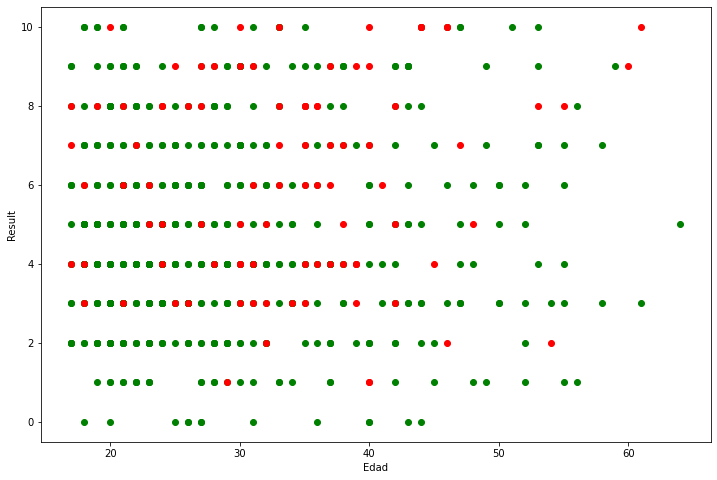

In [56]:
plt.figure(figsize=(12, 8))
clases=np.unique(dataframe.austim)
col=["green","red"]
for color,clase in zip(col,clases):
    plt.scatter(np.array(dataframe)[dataframe.austim==clase,10],  #10 es la columna edad
                np.array(dataframe)[dataframe.austim==clase,17],c=color)   #17 es la columna result
plt.xlabel("Edad")
plt.ylabel("Result")

Desde este grafico notamos que el result de las pruebas no depiende de la edad de los individuos. Además non hay clara separación entre las dos clases solamente utilizando estas dos variables. 

Ahora representamos un **gráfico de barras para la variable categorica ethnicity**:

Text(0.5, 1.0, 'Gráfico de barras variable ethnicity')

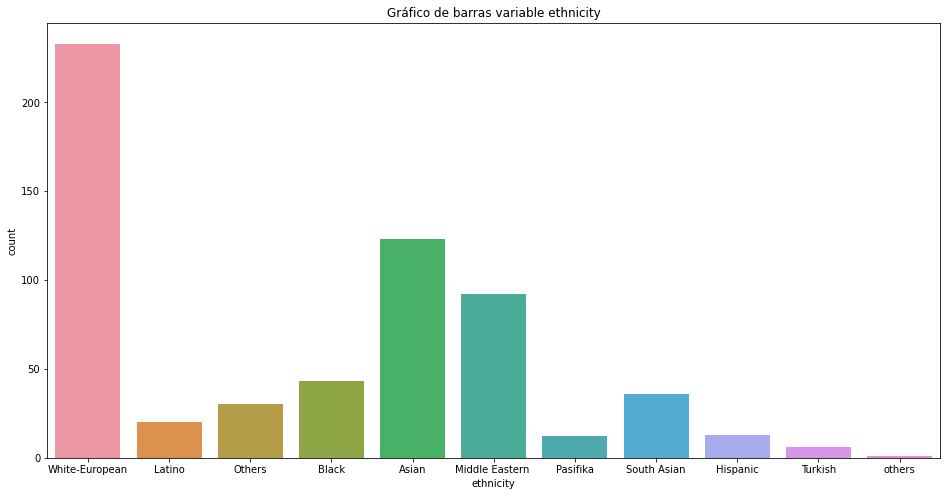

In [57]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.countplot(x="ethnicity", data= dataframe)
plt.title("Gráfico de barras variable ethnicity")

**NB**: Notamos que en la columna ethnicity hay una stringa escrita mal, es decir en lugar de "Others" esta escrito "others". Explorando los datos comprobamos el problema, luego lo arreglamos.

In [58]:
mask=dataframe['ethnicity']=='others'   #boolean vector
dataframe.loc[mask,'ethnicity']='Others'   #arreglo
#dataframe.loc[:,'ethnicity'][dataframe['ethnicity']=='others'] ='Others'   #nos daba warning

Text(0.5, 1.0, 'Gráfico de barras variable ethnicity')

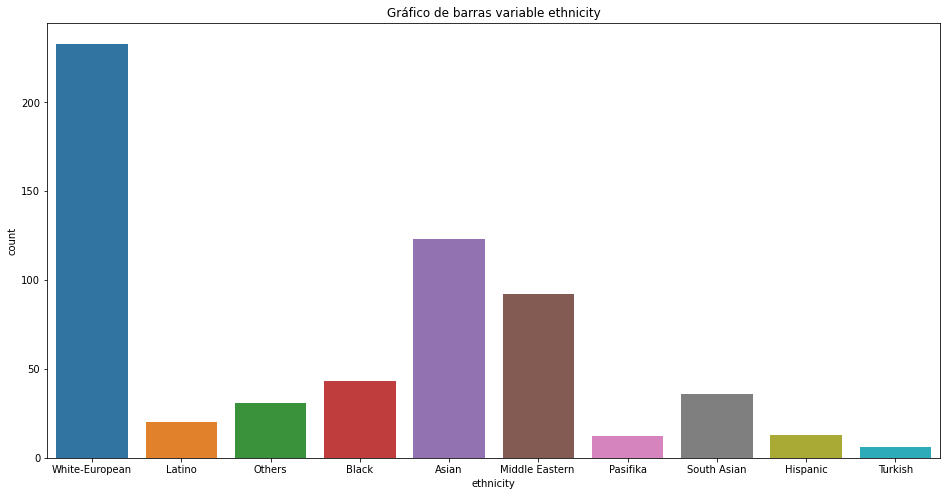

In [59]:
plt.figure(figsize=(16,8))
sns.countplot(x="ethnicity", data= dataframe)  #comprobo
plt.title("Gráfico de barras variable ethnicity")

Además representamos un **gráfico de barras para la variable categorica country_of_res**:

Text(0.5, 1.0, 'Gráfico de barras variable country_of_res')

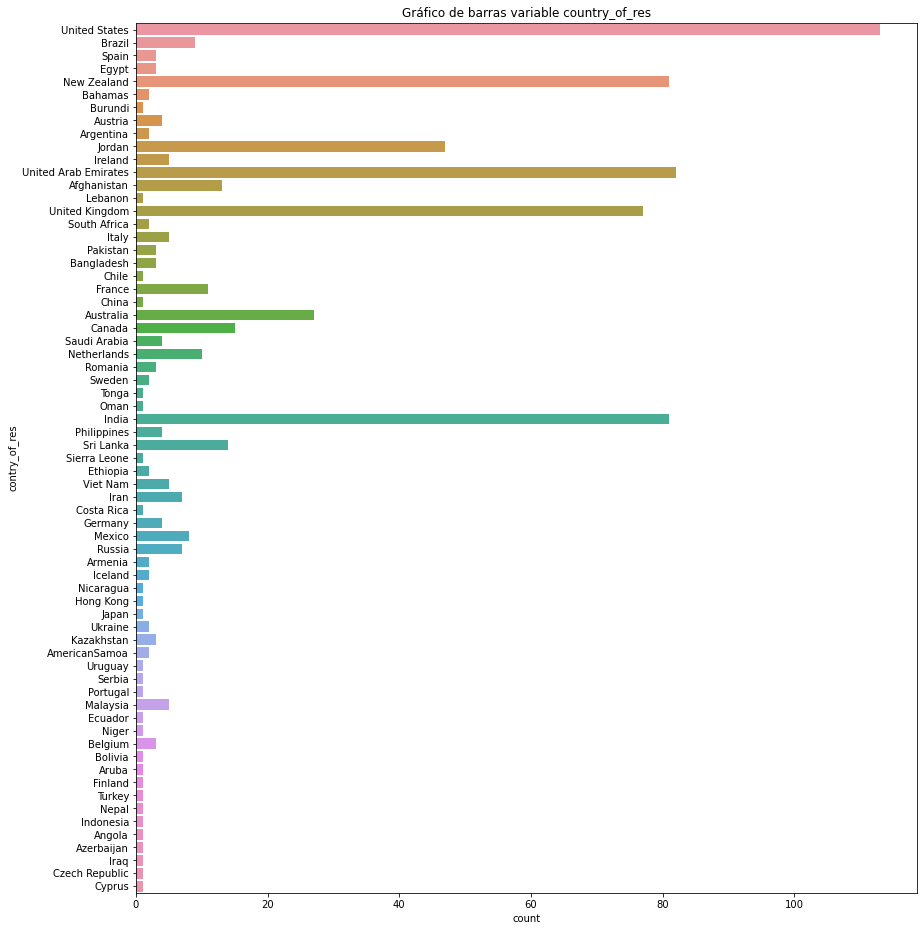

In [60]:
plt.figure(figsize=(14,16))
sns.countplot(y="contry_of_res", data= dataframe)
plt.title("Gráfico de barras variable country_of_res")

## Preprocesado de los datos: valores ausentes, tratamiento de variables categoricas y escalado

Combrobamos l'**existencia de valores ausentes** usando el método isnull() de los dataframe de Pandas, que crea un índice de los valores nulos, y a continuación contamos cuantos valores nulos hay para cada característica con el método sum().

In [61]:
dataframe.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
relation           95
Class/ASD           0
dtype: int64

Primero miramos que tenemos **dos valores perdidos por la variable edad**. 

Vamos a **rellenar los valores ausentes de la característica edad con la media de todos los datos disponibles**. El valor de la media se puede obtener con el método mean() de los dataframe.

In [62]:
dataframe['age'].mean()

29.193732193732195

Antes de proceder, **separamos la columna de clasificacion**:

In [63]:
y_ASD=dataframe['austim']

del dataframe['austim']
dataframe.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,United States,no,6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,Brazil,no,5,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,Spain,no,8,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,United States,no,6,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,NaN,no,Egypt,no,2,NaN,NO


Con el comando unique de la librería numpy notamos que **no tenemos clases equilibradas**:

In [64]:
np.unique(y_ASD,return_counts=True) #clases no balanceadas

(array(['no', 'yes'], dtype=object), array([613,  91], dtype=int64))

Utilizamos la clase **ColumnTransformer** para rellenar los valores vacios de **edad**. La clase **SimpleImputer** utilizada sola no estaría bien porque utilizaría el mismo metodo sobre todos los vacios del conjunto de datos, que no es lo que queremos hacer.
Añadimos **parametros adicionales para mantener el orden de las variables**.
Además a través del mismo comando podemos tratar los **datos categoricos** (ad excepción de ethnicity y relation, que rellenaremos despues mediante imputacion predictiva y de contry_of_res para la cual utilizaremos codificación por frecuencia).

Eligimos **codificación One-Hot para la variable Gender (Sexo)**, porque no tiene sentido introducir un orden artificial para esta variable.
Mientras que para las **variables jundice, used_app_before y Class/ASD**  utilizamos un ajuste con **correspondencia numerica**, porque se trata de valores que indican presencia o ausencia de una cierta caracteristica.

In [65]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


ct = ColumnTransformer([("original1",'passthrough',['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score']),
                        ("media",SimpleImputer(strategy='mean'),['age']),   #relleno variable edad con media de los datos
                        ("ohe1",OneHotEncoder(),['gender']),   #codificación One Hot para el gender
                        ("original2",'passthrough',['ethnicity']),
                        ("oe1",OrdinalEncoder(),['jundice']),  #codificación numerica
                        ("original3",'passthrough',['contry_of_res']),
                        ("oe2",OrdinalEncoder(),['used_app_before']),   #codificación numerica
                        ("original4",'passthrough',['result','relation']),
                        ("oe3",OrdinalEncoder(),['Class/ASD'])])   #codificación numerica

X_ASD = ct.fit_transform(dataframe)  #aplicamos el transformador
X_ASD

#Comprobacion age
missing_age=dataframe['age'].isnull()
print(X_ASD[missing_age],"\n")

#Comprobacion que las mujeres son la primera columna, y los hombres la segunda de las dos anadidas con one-hot encoding

#Comprobacion que en las variables jundice, used_app y Class/ASD el ajuste con correspondencia numerica substituye los no con 0 
#y los yes con 1

print(X_ASD[0:5,:])
dataframe.head()

[[0 0 0 0 0 0 0 0 0 0 29.193732193732195 0.0 1.0 nan 0.0 'Saudi Arabia'
  0.0 0 nan 0.0]
 [0 1 0 0 1 0 1 0 0 1 29.193732193732195 1.0 0.0 nan 0.0 'Jordan' 0.0 4
  nan 0.0]] 

[[1 1 1 1 0 0 1 1 0 0 26.0 1.0 0.0 'White-European' 0.0 'United States'
  0.0 6 'Self' 0.0]
 [1 1 0 1 0 0 0 1 0 1 24.0 0.0 1.0 'Latino' 0.0 'Brazil' 0.0 5 'Self' 0.0]
 [1 1 0 1 1 0 1 1 1 1 27.0 0.0 1.0 'Latino' 1.0 'Spain' 0.0 8 'Parent'
  1.0]
 [1 1 0 1 0 0 1 1 0 1 35.0 1.0 0.0 'White-European' 0.0 'United States'
  0.0 6 'Self' 0.0]
 [1 0 0 0 0 0 0 1 0 0 40.0 1.0 0.0 nan 0.0 'Egypt' 0.0 2 nan 0.0]]


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,United States,no,6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,Brazil,no,5,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,Spain,no,8,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,United States,no,6,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,NaN,no,Egypt,no,2,NaN,NO


Tranformamos la variable **country_of_res** utilizando un orden artificial dado da una **codificación por frecuencia**. Preferimos esto respeto a añadir 66 nuevas variables, que produciría demasiado aumento de la dimensionalidad.

In [66]:
np.shape(np.unique(dataframe.contry_of_res))

(67,)

In [85]:
#convertimos X_ASD en un dataframe para proceder con el ajuste de codificacion por frecuencia

colnames=['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','age','woman','man','ethnicity','jundice','country_of_res','used_app_before','result','relation','Class/ASD']
dataframe= pd.DataFrame(X_ASD,columns=colnames)
dataframe.head()

sorted_indices = dataframe.country_of_res.value_counts().index   #countries en orden de frecuencia
print(sorted_indices, "\n")
dataframe.country_of_res = dataframe.country_of_res.map(dict(zip(sorted_indices, range(1, len(sorted_indices)+1))))
dataframe.country_of_res   #hemos construido un diccionario con llaves los paises y con valores el orden introducido y 
                           #luego sustituimos en el dataframe los paises con los valores correspondientes 
                           # (codificación por frecuencia)

Index(['United States', 'United Arab Emirates', 'New Zealand', 'India',
       'United Kingdom', 'Jordan', 'Australia', 'Canada', 'Sri Lanka',
       'Afghanistan', 'France', 'Netherlands', 'Brazil', 'Mexico', 'Russia',
       'Iran', 'Ireland', 'Italy', 'Viet Nam', 'Malaysia', 'Austria',
       'Saudi Arabia', 'Philippines', 'Germany', 'Spain', 'Romania', 'Egypt',
       'Kazakhstan', 'Belgium', 'Bangladesh', 'Pakistan', 'Ethiopia',
       'Armenia', 'Ukraine', 'South Africa', 'Sweden', 'Bahamas', 'Argentina',
       'Iceland', 'AmericanSamoa', 'Bolivia', 'China', 'Burundi', 'Oman',
       'Lebanon', 'Chile', 'Serbia', 'Nicaragua', 'Angola', 'Iraq', 'Cyprus',
       'Japan', 'Czech Republic', 'Finland', 'Azerbaijan', 'Costa Rica',
       'Indonesia', 'Turkey', 'Aruba', 'Nepal', 'Tonga', 'Uruguay',
       'Hong Kong', 'Ecuador', 'Sierra Leone', 'Portugal', 'Niger'],
      dtype='object') 



0       1
1      13
2      25
3       1
4      27
       ..
699    15
700    14
701    15
702    31
703    51
Name: country_of_res, Length: 704, dtype: int64

Notamos que hay tambien **95 valores ausentes** para las dos variables **ethnicity** y **relation** que comprobamos provenir de los mismos datos. Entonces siendo que estes 95 datos añaden incertitumbres sobre dos variables una opcion que en nuestra situacion tendria sentido seria eliminarlos. Pero elijimos de no hacer esta decision drastica, es decir **los rellenamos**.

In [67]:
#comprobacion que los valores ausentes provienen de los mismos datos
missing1=dataframe['ethnicity'].isnull()
missing2=dataframe['relation'].isnull()

dataframe[missing2].index==dataframe[missing1].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

Decidimos de utilizar un **metodo de imputacion predictiva** para rellenar los huecos de las dos variables.
En particular utilizamos un **Arbol de Clasificación y dos versiones de Regresion Logistica (One vs rest y Multinomial)** analizando los diferentes rendimientos sobre un subconjunto de validacion (extraido desde los datos completos) para elegir el mejor metodo a utilizar.

###### Es decir, para cada de las dos variables y para cada metodo elegido, entrenamos un modelo predictivo siendo la variable respuesta una variable con valores ausentes y considerando como conjunto de entrenamiento registros de datos con valores conocidos para la variable. Los nuevos valores seran las predicciones sobre los registros con valor desconocido.

In [86]:
data_no_miss = dataframe[dataframe.ethnicity.notnull()]
data_no_miss

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,woman,man,ethnicity,jundice,country_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,1,0,White-European,0,1,0,6,Self,0
1,1,1,0,1,0,0,0,1,0,1,24,0,1,Latino,0,13,0,5,Self,0
2,1,1,0,1,1,0,1,1,1,1,27,0,1,Latino,1,25,0,8,Parent,1
3,1,1,0,1,0,0,1,1,0,1,35,1,0,White-European,0,1,0,6,Self,0
5,1,1,1,1,1,0,1,1,1,1,36,0,1,Others,1,1,0,9,Self,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,1,1,1,1,1,1,1,1,1,1,27,1,0,Pasifika,0,7,0,10,Self,1
699,0,1,0,1,1,0,1,1,1,1,25,1,0,White-European,0,15,0,7,Self,1
700,1,0,0,0,0,0,0,1,0,1,34,0,1,Hispanic,0,14,0,3,Parent,0
702,1,0,0,1,1,0,1,0,1,1,35,0,1,South Asian,0,31,0,6,Self,0


**Separamos las dos columnas relativas a las dos variables contenientes valores ausentes**. Entrenamos los modelos utilizando todas las otras variables asi que los valores perdidos de la variable que no estamos predicendo no influyen los entrenamientos de los modelos predictivos para la otra variable.

In [87]:
y_ethnicity=data_no_miss.ethnicity
y_relation=data_no_miss.relation

del data_no_miss['ethnicity']
del data_no_miss['relation']

data_no_miss.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,woman,man,jundice,country_of_res,used_app_before,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,1,0,0,1,0,6,0
1,1,1,0,1,0,0,0,1,0,1,24,0,1,0,13,0,5,0
2,1,1,0,1,1,0,1,1,1,1,27,0,1,1,25,0,8,1
3,1,1,0,1,0,0,1,1,0,1,35,1,0,0,1,0,6,0
5,1,1,1,1,1,0,1,1,1,1,36,0,1,1,1,0,9,1


#### **VARIABLE ETHNICITY**: elección mejor metodo de clasificación

In [88]:
from sklearn.model_selection import train_test_split


X_eth_train, X_eth_valid, y_eth_train, y_eth_valid = train_test_split(np.array(data_no_miss), np.array(y_ethnicity),
                                                                      stratify=np.array(y_ethnicity))


**ARBOL DE DECISION**

Elijimos el valor de max-depth veendo como **evoluciona el error sobre el conjunto de validación para diferentes profundidades**:

In [89]:
from sklearn.tree import DecisionTreeClassifier

for i in range(1,30):
    tree = DecisionTreeClassifier(max_depth=i, random_state=0)
    tree.fit(X_eth_train, y_eth_train)

    print("Depth: {}. Accuracy on training set: {:.3f}".format(i, tree.score(X_eth_train, y_eth_train)))
    print("Depth: {}. Accuracy on valid set: {:.3f}".format(i, tree.score(X_eth_valid, y_eth_valid)))

Depth: 1. Accuracy on training set: 0.382
Depth: 1. Accuracy on valid set: 0.386
Depth: 2. Accuracy on training set: 0.439
Depth: 2. Accuracy on valid set: 0.431
Depth: 3. Accuracy on training set: 0.564
Depth: 3. Accuracy on valid set: 0.582
Depth: 4. Accuracy on training set: 0.594
Depth: 4. Accuracy on valid set: 0.569
Depth: 5. Accuracy on training set: 0.636
Depth: 5. Accuracy on valid set: 0.562
Depth: 6. Accuracy on training set: 0.684
Depth: 6. Accuracy on valid set: 0.562
Depth: 7. Accuracy on training set: 0.741
Depth: 7. Accuracy on valid set: 0.510
Depth: 8. Accuracy on training set: 0.814
Depth: 8. Accuracy on valid set: 0.503
Depth: 9. Accuracy on training set: 0.875
Depth: 9. Accuracy on valid set: 0.510
Depth: 10. Accuracy on training set: 0.925
Depth: 10. Accuracy on valid set: 0.497
Depth: 11. Accuracy on training set: 0.958
Depth: 11. Accuracy on valid set: 0.471
Depth: 12. Accuracy on training set: 0.974
Depth: 12. Accuracy on valid set: 0.477
Depth: 13. Accuracy on

**REGRESION LOGISTICA: ONE VS REST**

In [90]:
from sklearn.linear_model import LogisticRegression

logreg_ovr = LogisticRegression(max_iter=2000,multi_class='ovr').fit(X_eth_train, y_eth_train)

print("Rendimiento sobre valid: {:.3f}".format(logreg_ovr.score(X_eth_valid, y_eth_valid)))

Rendimiento sobre valid: 0.451


**REGRESION LOGISTICA: MULTINOMIAL**

In [91]:
logreg_multi = LogisticRegression(max_iter=2000,multi_class='multinomial').fit(X_eth_train, y_eth_train)

print("Rendimiento sobre valid: {:.3f}".format(logreg_multi.score(X_eth_valid, y_eth_valid)))

Rendimiento sobre valid: 0.438


**VARIABLE RELATION**: eleccion mejor metodo de clasificacion

In [92]:
X_rel_train, X_rel_valid, y_rel_train, y_rel_valid = train_test_split(np.array(data_no_miss), np.array(y_relation),
                                                                      stratify=np.array(y_relation))

**ARBOL DE DECISION**

Elijimos el valor de max-depth veendo como evoluciona el error sobre el conjunto de evaluación para diferentes profundidades:

In [93]:
for i in range(1, 30):
    tree = DecisionTreeClassifier(max_depth=i, random_state=0)
    tree.fit(X_rel_train, y_rel_train)

    print("Depth: {}. Accuracy on training set: {:.3f}".format(i, tree.score(X_rel_train, y_rel_train)))
    print("Depth: {}. Accuracy on valid set: {:.3f}".format(i, tree.score(X_rel_valid, y_rel_valid)))

Depth: 1. Accuracy on training set: 0.857
Depth: 1. Accuracy on valid set: 0.856
Depth: 2. Accuracy on training set: 0.857
Depth: 2. Accuracy on valid set: 0.856
Depth: 3. Accuracy on training set: 0.871
Depth: 3. Accuracy on valid set: 0.850
Depth: 4. Accuracy on training set: 0.890
Depth: 4. Accuracy on valid set: 0.856
Depth: 5. Accuracy on training set: 0.904
Depth: 5. Accuracy on valid set: 0.856
Depth: 6. Accuracy on training set: 0.912
Depth: 6. Accuracy on valid set: 0.850
Depth: 7. Accuracy on training set: 0.932
Depth: 7. Accuracy on valid set: 0.824
Depth: 8. Accuracy on training set: 0.941
Depth: 8. Accuracy on valid set: 0.817
Depth: 9. Accuracy on training set: 0.954
Depth: 9. Accuracy on valid set: 0.810
Depth: 10. Accuracy on training set: 0.967
Depth: 10. Accuracy on valid set: 0.784
Depth: 11. Accuracy on training set: 0.978
Depth: 11. Accuracy on valid set: 0.791
Depth: 12. Accuracy on training set: 0.993
Depth: 12. Accuracy on valid set: 0.758
Depth: 13. Accuracy on

#### REGRESION LOGISTICA: ONE VS REST

In [94]:
logreg_ovr = LogisticRegression(max_iter=2000,multi_class='ovr').fit(X_rel_train, y_rel_train)

print("Rendimiento sobre valid: {:.3f}".format(logreg_ovr.score(X_rel_valid, y_rel_valid)))

Rendimiento sobre valid: 0.856


**REGRESION LOGISTICA: MULTINOMIAL**

In [95]:
logreg_multi = LogisticRegression(max_iter=2000,multi_class='multinomial').fit(X_rel_train, y_rel_train)

print("Rendimiento sobre valid: {:.3f}".format(logreg_multi.score(X_rel_valid, y_rel_valid)))

Rendimiento sobre valid: 0.856


**CONCLUSIONES**

Para la **variable ethnicity**, independientemente del metodo utilizado, desafortunatamente **no obtenemos buenos valores de rendimiento**, es decir el maximo rendimiento sobre el conjunto de validacion es alreadeador del 58% (a veces mas, a veces meno, siendo la separacion en los dos conjuntos de train y de valid aleatoria). Haciendolo partir diferentes veces, notamos que la **clasificacion mediante arboles** es siempre mejor que mediante regresion logistica. En particular elijimos max_depth=3 (la aleatoriedad cada vez modifica el valor optimo de max_depth).

Para la **variable relation** obtenemos muy **buenos valores de rendimientos con todos los tres metodos utilizados**. En particular la clasificacion mediante regresion logistica (ambos con OvR y Multinomial) nos devuelve casi siempre el mismo valor alto de rendimiento: 85.6 %. Elijimos de utilizar **Regresion logistica OvR**.

In [96]:
data_miss= dataframe[dataframe.ethnicity.isnull()]
del data_miss['ethnicity']
del data_miss['relation']
data_miss

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,woman,man,jundice,country_of_res,used_app_before,result,Class/ASD
4,1,0,0,0,0,0,0,1,0,0,40,1,0,0,27,0,2,0
12,0,1,1,1,1,1,0,0,1,0,17,1,0,0,37,0,6,0
13,1,0,0,0,0,0,1,1,0,1,17,0,1,0,21,0,4,0
14,1,0,0,0,0,0,1,1,0,1,17,1,0,0,38,0,4,0
19,0,0,0,0,0,0,1,1,0,1,34,0,1,1,2,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0,0,0,0,0,0,0,0,0,1,33,1,0,0,1,0,1,0
658,0,0,1,1,0,0,1,0,0,0,43,0,1,0,55,0,3,0
659,1,1,1,1,1,1,0,0,1,1,44,0,1,0,31,0,8,1
666,0,0,0,0,0,0,0,1,0,0,56,0,1,0,50,0,1,0


In [97]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_eth_train, y_eth_train)  #entrenamos con el valor de max_depth optimo
y_miss_ethnicity=tree.predict(data_miss)   #predicimos sobre los valores con huecos

In [98]:
y_miss_relation=logreg_ovr.predict(data_miss)

**Substituimos los valores obtenidos con imputacion predictiva** (elegimos de manejar directamente los '?' del conjunto original a traves de los array de numpy, en vez que los valores NaN como hecho antes, porquè este valor especial es de tipo float, mientras que las variables ethnicity y relation por el momento son de tipo string)

In [99]:
data_supporto=pd.read_csv("autism_screening.csv")   #importamos nuevamente los datos, manteniendo los '?'

y_tot_ethnicity=np.array(data_supporto.ethnicity)  #columna ethnicity
y_tot_ethnicity[y_tot_ethnicity=='others']='Others'   #mismo problema de antes

y_tot_relation=np.array(data_supporto.relation)  #columna relation

#rellenamos los huecos 
y_tot_ethnicity[y_tot_ethnicity=='?']=y_miss_ethnicity
y_tot_relation[y_tot_relation=='?']=y_miss_relation

In [101]:
#substituimos las columnas enteras en el dataframe principal
dataframe.ethnicity=y_tot_ethnicity
dataframe.relation=y_tot_relation

dataframe.isnull().sum()  #comprobacion que no tenemos mas valores ausentes

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
woman              0
man                0
ethnicity          0
jundice            0
country_of_res     0
used_app_before    0
result             0
relation           0
Class/ASD          0
dtype: int64

En fin podemos proceder **tratando las dos variables categoricas ethnicity y relation con codificacion por frecuencia**.

In [102]:
sorted_indices = dataframe.ethnicity.value_counts().index   #ethnicity en orden de frecuencia
print(sorted_indices, "\n")
dataframe.ethnicity = dataframe.ethnicity.map(dict(zip(sorted_indices, range(1, len(sorted_indices)+1))))

sorted_indices = dataframe.relation.value_counts().index   #relation en orden de frecuencia
print(sorted_indices, "\n")
dataframe.relation = dataframe.relation.map(dict(zip(sorted_indices, range(1, len(sorted_indices)+1))))

Index(['White-European', 'Asian', 'Middle Eastern ', 'Black', 'South Asian',
       'Others', 'Latino', 'Hispanic', 'Pasifika', 'Turkish'],
      dtype='object') 

Index(['Self', 'Parent', 'Relative', 'Others', 'Health care professional'], dtype='object') 



In [104]:
dataframe.head()  #hasta aqui hemos rellenados todos los valores ausentes y transformados las variables categoricas

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,woman,man,ethnicity,jundice,country_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,1,0,1,0,1,0,6,1,0
1,1,1,0,1,0,0,0,1,0,1,24,0,1,7,0,13,0,5,1,0
2,1,1,0,1,1,0,1,1,1,1,27,0,1,7,1,25,0,8,2,1
3,1,1,0,1,0,0,1,1,0,1,35,1,0,1,0,1,0,6,1,0
4,1,0,0,0,0,0,0,1,0,0,40,1,0,1,0,27,0,2,1,0


#### ESCALADO

El conjunto de datos esta **casi listo para empezar el analisis**. Notamos que **no hay demasiada diferencia de magnitud entre las caracteristicas**, pero eligimos de tratar las dos variables que tienen valores mas altos (edad y country_of_res) utilizando **tecnicas de escaldado mediante mínimo y máximo** que se consiguen con la clase MinMaxScaler de la librería preprocessing.

In [105]:
from sklearn.preprocessing import MinMaxScaler

ct = ColumnTransformer([("original1",'passthrough',['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score']),
                        ("scaler1",MinMaxScaler(),['age']),  #escalado de maximo y minimo por edad
                        ("original2",'passthrough',['woman','man','ethnicity','jundice']),
                        ("scaler2",MinMaxScaler(),['country_of_res']), #escalado de maximo y minimo por country_of res
                        ("original3",'passthrough',['used_app_before','result','relation','Class/ASD'])])

X = ct.fit_transform(dataframe)   #sabemos que X es nuestro dataframe final en version de array de numpy
#print(X)
dataframe_final= pd.DataFrame(X,columns=colnames,dtype='float64')  
#dataframe_final
dataframe_final.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,woman,man,ethnicity,jundice,country_of_res,used_app_before,result,relation,Class/ASD
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.191489,1.0,0.0,1.0,0.0,0.000000,0.0,6.0,1.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.148936,0.0,1.0,7.0,0.0,0.181818,0.0,5.0,1.0,0.0
2,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.212766,0.0,1.0,7.0,1.0,0.363636,0.0,8.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.382979,1.0,0.0,1.0,0.0,0.000000,0.0,6.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.489362,1.0,0.0,1.0,0.0,0.393939,0.0,2.0,1.0,0.0


## Ingeniería y selección de características

**Para cada metodo de seleccion de caracteristicas que analizamos guardamos en un array las variables que serian despreciadas y al final miramos y luego quitamos las variables que globalmente parecen meno importantes para el estudio.**
Desafortunadamente algunos metodos tienen aleatoriedad y no siempre devuelven los mismos vectores de variables despreciadas. Pero el importante es que, aunque hay aleatoriedad de las variables despreciadas, las variables mas importantes da retener son casi siempre las mismas. 

### Matríz de correlaciones
El análisis de las correlaciones entre variables es una de las herramientas más sencillas para seleccionar variables y que pertenece a los **métodos de filtrado**. 

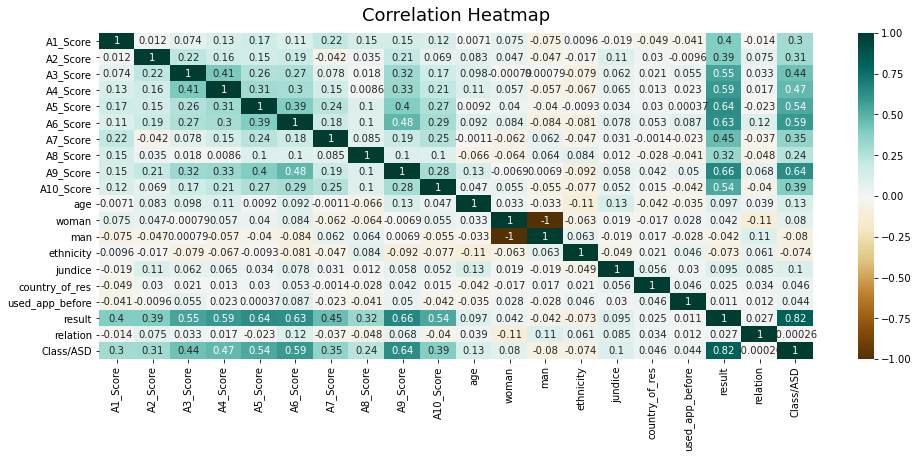

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataframe_final.corr(), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG') # method='spearman' / kendall 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

La Analisis de la matriz de correlacion nos sugiere **eliminar una entre la variable mujer o hombre** porque estan linealmente correladas.

### Correlaciones con la variable respuesta

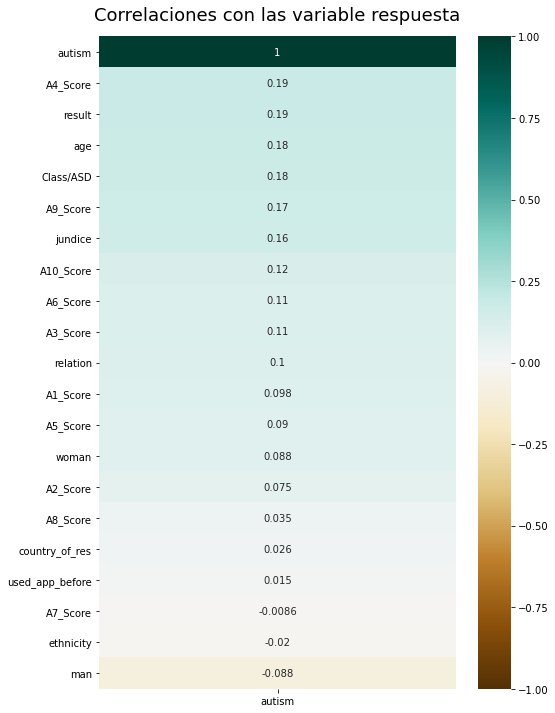

In [107]:
#anadimos la columna de clasificacion para estudiar las correlaciones con la variable respuesta,
#pero lo hacemos sobre una copia para no modificar nuestro dataframe finale

data_con_autismo= dataframe_final.copy()

data_con_autismo['autism'] = y_ASD
ct = ColumnTransformer([("original1",'passthrough',['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score',
                                                   'age','woman','man','ethnicity','jundice','country_of_res','used_app_before','result','relation','Class/ASD']),
                        ("oe1",OrdinalEncoder(),['autism'])])   #aplicamos codificacion numerica al vector de clasificacion
X_con_ASD=ct.fit_transform(data_con_autismo)

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(pd.DataFrame(X_con_ASD,columns=data_con_autismo.columns).corr()[['autism']].sort_values(by='autism', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlaciones con las variable respuesta', fontdict={'fontsize':18}, pad=16);

Este tipo de análisis puede usarse para eliminar las variables menos correladas con la variable respuesta. 


In [108]:
eliminar_corr= np.array(['A8_Score','country_of_res','used_app_before','A7_Score','ethnicity'])
#utilizando una correlacion minima de 0.05 en valor absoluto

### Modelo base

Antes de empezar a eliminar características vamos a obtener un modelo de base, o de referencia, utilizando Validacion Cruzada, que nos permita valorar las mejoras que vamos obteniendo.

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#esta funcion realiza Cross Validacion utilizando las caracteristicas indicadas en el parametro features
def cv_experiment(X, y, features, cv):
    dt = DecisionTreeClassifier(random_state=1234) 
    return cross_val_score(dt, X[features], y, cv=cv, scoring='balanced_accuracy')

In [110]:
from sklearn.model_selection import StratifiedKFold

strat_cv = StratifiedKFold(5, shuffle=True, random_state=1234) #metodo de estratificacion para la validacion cruzada

In [111]:
ASD_features = dataframe_final.columns
cv_experiment(dataframe_final, y_ASD, ASD_features, cv=strat_cv).mean()

0.5549296071045265

Notamos que el **rendimiento es bastante malo**, entonces procedemos probando ad aplicar **tecnicas de seleccion de caracteristicas para reducir la complexidad del modello**. De hecho sabemos que reduciendo la dimensionalidad hay beneficios:
- menor coste computacional y menor tiempo
- reduccion de ruido y del riesgo de sobreajuste y mayor capacidad predictiva

### Métodos de envoltura

Los métodos de envoltura usan el **rendimiento de un modelo predictivo cómo indicador de la bondad de un conjunto de atributos**.
En particular utilizamos como metodo secuenciale, el método de **selección secuencial hacia atrás**, es decir eliminamos la peor caracteristica en cada iteracion y evaluamos. Repetimos esto para todas las características, es decir, vamos a evaluar todos los subconjuntos de de características de tamaño $N - 1$.


Conjuntos con $N - 1$ características

In [112]:
import itertools

for feature_set in itertools.combinations(ASD_features, len(ASD_features) - 1):
    print('N_feat: {}, Features: {}'.format(len(feature_set), feature_set))

N_feat: 19, Features: ('A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'woman', 'man', 'ethnicity', 'jundice', 'country_of_res', 'used_app_before', 'result', 'relation')
N_feat: 19, Features: ('A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'woman', 'man', 'ethnicity', 'jundice', 'country_of_res', 'used_app_before', 'result', 'Class/ASD')
N_feat: 19, Features: ('A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'woman', 'man', 'ethnicity', 'jundice', 'country_of_res', 'used_app_before', 'relation', 'Class/ASD')
N_feat: 19, Features: ('A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'woman', 'man', 'ethnicity', 'jundice', 'country_of_res', 'result', 'relation', 'Class/ASD')
N_

Rendimiento para cada uno de los subconjuntos

In [113]:
for i, feature_set in enumerate(itertools.combinations(ASD_features, len(ASD_features) - 1)):
    score = cv_experiment(dataframe_final, y_ASD, list(feature_set), cv=strat_cv).mean()
    print('{} SCORE: {}, Features: {}'.format(i, score, feature_set))

0 SCORE: 0.5856470277386121, Features: ('A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'woman', 'man', 'ethnicity', 'jundice', 'country_of_res', 'used_app_before', 'result', 'relation')
1 SCORE: 0.5725647752594869, Features: ('A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'woman', 'man', 'ethnicity', 'jundice', 'country_of_res', 'used_app_before', 'result', 'Class/ASD')
2 SCORE: 0.5365561377788066, Features: ('A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'woman', 'man', 'ethnicity', 'jundice', 'country_of_res', 'used_app_before', 'relation', 'Class/ASD')
3 SCORE: 0.5701124228671104, Features: ('A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'woman', 'man', 'ethnicity'

Seleccionamos el peor de los subcojuntos:

In [114]:
best_score = 0
best_subset = None
for i, feature_set in enumerate(itertools.combinations(ASD_features, len(ASD_features) - 1)):
    score = cv_experiment(dataframe_final, y_ASD, list(feature_set), cv=strat_cv).mean()
    if score > best_score:
        best_score = score
        best_subset = (i, feature_set)
    
print('{} SCORE: {}, Features: {}'.format(best_subset[0], best_score, best_subset[1]))
print('Worst feature: {}'.format(set(ASD_features)-set(best_subset[1])))

15 SCORE: 0.5875854336627921, Features: ('A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'woman', 'man', 'ethnicity', 'jundice', 'country_of_res', 'used_app_before', 'result', 'relation', 'Class/ASD')
Worst feature: {'A5_Score'}


Por tanto, tras la primera iteración, sugere eliminar la característica **A5_Score**

In [115]:
new_features = best_subset[1]
print(new_features)

('A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'woman', 'man', 'ethnicity', 'jundice', 'country_of_res', 'used_app_before', 'result', 'relation', 'Class/ASD')


La librería `mlxtend` de Python, proporciona diferentes **algoritomos y herramientas de aprendizaje automático** que quedan fuera del alcance de Scikit-learn, como por ejemplo, los **métodos de selección de características de tipo envoltura**.

In [204]:
#!pip install mlxtend

In [116]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

dt = DecisionTreeClassifier(random_state=1234)

#Con el parámetro k_features indicamos el número de características a retener antes de parar. 
#Con el parámetro forward=False indicamos que la búsqueda es hacia atrás.

sbs = SFS(dt, k_features=1, forward=False, floating=False, 
          scoring='balanced_accuracy',cv=strat_cv) #verbose=2

sbs = sbs.fit(dataframe_final, y_ASD)

Una vez que ha terminado la ejecución, **podemos consultar los mejores subconjuntos para cada número posible de características**.

In [117]:
sbs.subsets_

{20: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19),
  'cv_scores': array([0.52574526, 0.54539295, 0.60162602, 0.60461605, 0.49726776]),
  'avg_score': 0.5549296071045265,
  'feature_names': ('A1_Score',
   'A2_Score',
   'A3_Score',
   'A4_Score',
   'A5_Score',
   'A6_Score',
   'A7_Score',
   'A8_Score',
   'A9_Score',
   'A10_Score',
   'age',
   'woman',
   'man',
   'ethnicity',
   'jundice',
   'country_of_res',
   'used_app_before',
   'result',
   'relation',
   'Class/ASD')},
 19: {'feature_idx': (0,
   1,
   2,
   3,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19),
  'cv_scores': array([0.56165312, 0.58943089, 0.65718157, 0.61691113, 0.51275046]),
  'avg_score': 0.5875854336627921,
  'feature_names': ('A1_Score',
   'A2_Score',
   'A3_Score',
   'A4_Score',
   'A6_Score',
   'A7_Score',
   'A8_Score',
   'A9_Score',
   'A10_Scor

El mejor subconjunto tiene rendimiento medio de **0.6315664377523845** y es asociado a retener 12 variables de las 20 originales.

In [118]:
eliminar_envoltura=np.array(['A1_Score','A5_Score','A7_Score','A8_Score','A10_Score','man','country_of_res','used_app_before'])

Dado que el rendimiento no es tan alto, procedimos con **otras tecnicas de seleccion de caracteristicas** para ententar de mejorar.

### Métodos integrados - selección de características basada en modelos

Estes metodos seleccionan las mejores caracteristicas usando un **umbral** y luego miran las importancia de cada caracteristica.

*Scikit-learn* también implementa la selección de características basada en modelos. Se trata de la clase `SelectFromModel` de la librería `feature_selection`. Podemos seleccionar las mejores características a partir de Scikit-learn que proporcione la información `feature_importances_` o `coef_`.

In [119]:
from sklearn.feature_selection import SelectFromModel

selection1 = SelectFromModel(DecisionTreeClassifier(random_state=1234))

selection1.fit(dataframe_final, y_ASD)

SelectFromModel(estimator=DecisionTreeClassifier(random_state=1234))

Con el método `get_support()` podemos obtener un índice de las mejores características encontradas.

In [120]:
selection1.get_support()

array([False,  True, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
       False, False])

Dado que el punto de corte ha sido elegido por el algoritmo, veamos su valor.

In [121]:
selection1.threshold_

0.05000000000000001

In [122]:
dt_fi = pd.DataFrame({'feature': ASD_features, 
                      'selected': selection1.get_support(),  
                      'feature_importance': selection1.estimator_.feature_importances_})
dt_fi.sort_values(by='feature_importance', ascending=False)

,feature,selected,feature_importance
10,age,True,0.246121
13,ethnicity,True,0.129111
15,country_of_res,True,0.126253
17,result,True,0.103230
1,A2_Score,True,0.051187
18,relation,False,0.048796
9,A10_Score,False,0.037481
3,A4_Score,False,0.036770
5,A6_Score,False,0.033980
14,jundice,False,0.030283


Segun este metodo las **caracteristicas mas importantes a utilizar** son: age, ethnicity, country_of_res, result y A2_Score.

In [123]:
eliminar_integrados_tree=np.array(['A5_Score','A1_Score','Class/ASD','used_app_before','man','A6_Score','woman','A3_Score','A7_Score','A9_Score','A8_Score','relation','A4_Score','A10_Score','jundice'])

A continuación probamos con **RandomForest**, usando una cantidad adecuada de estimadores. Veamos si hay diferencias.

In [124]:
from sklearn.ensemble import RandomForestClassifier

selection2 = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=1234))

selection2.fit(dataframe_final, y_ASD)

SelectFromModel(estimator=RandomForestClassifier(random_state=1234))

In [125]:
selection2.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
       False, False])

In [126]:
selection2.threshold_

0.05

In [127]:
dt_fi = pd.DataFrame({'feature': ASD_features, 
                      'selected': selection2.get_support(),  
                      'feature_importance': selection2.estimator_.feature_importances_})
dt_fi.sort_values(by='feature_importance', ascending=False)

,feature,selected,feature_importance
10,age,True,0.211509
15,country_of_res,True,0.143746
17,result,True,0.098563
13,ethnicity,True,0.084800
18,relation,False,0.044713
1,A2_Score,False,0.038356
14,jundice,False,0.038056
6,A7_Score,False,0.036109
9,A10_Score,False,0.031899
3,A4_Score,False,0.031727


Segun RandomForest las **caracteristicas mas importantes a utilizar son**: age, country_of_res, result y ethnicity.

In [128]:
eliminar_integrados_rforest=np.array(['A5_Score','A1_Score','Class/ASD','used_app_before','man','A6_Score','woman','A3_Score','A7_Score','A9_Score','A8_Score','relation','A4_Score','A10_Score','jundice','A2_Score'])

### Métodos híbridos - Eliminación recursiva de características (Scikit)

Este método usa por un lado la **importancia de características** para elegir la peor característica a eliminar y por otro lado, vuelve a entrenar el modelo en cada iteración para recalcular las importancias.

In [129]:
from sklearn.feature_selection import RFE

dt = DecisionTreeClassifier(random_state=1234)

selector = RFE(dt)

selector.fit(dataframe_final, y_ASD)

RFE(estimator=DecisionTreeClassifier(random_state=1234))

En el campo `support_` se almacena un índice de las características que se obtienen como mejores.

In [130]:
selector.support_

array([False,  True, False,  True, False, False, False, False, False,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True, False])

In [131]:
selector.ranking_

array([11,  1,  6,  1,  8,  4,  2,  3,  5,  1,  1,  1, 10,  1,  1,  1,  7,
        1,  1,  9])

In [132]:
dataframe_final.columns[selector.support_]

Index(['A2_Score', 'A4_Score', 'A10_Score', 'age', 'woman', 'ethnicity',
       'jundice', 'country_of_res', 'result', 'relation'],
      dtype='object')

Utilizando el **metodo hibrido por eliminacion recursiva las mejores caracteristicas seleccionadas son**:
'A2_Score', 'A4_Score', 'A10_Score', 'age', 'woman', 'ethnicity','jundice', 'country_of_res', 'result', 'relation'.

In [133]:
eliminar_hybrida_recursiva=np.array(['A5_Score','A1_Score','Class/ASD','used_app_before','man','A6_Score','A3_Score','A7_Score', 'A8_Score', 'A9_Score'])

### Métodos híbridos - Selección de características por permutación

**Metodo robusto y con un equilibrio razonable entre coste computacional y resultado**:
- entrenamos un modelo base y calculamos el error base del modelo con todas las caracteristicas
- para cada caracteristica de conjunto de test: permutamos su valores (anadimos ruido y rompemos cualcuier tipo de relacion que pudiese existir entre esa variable y la variable respuesta) y calculamos las predicciones 
- definimos la importancia de la caracteristica como la diferencia en el error cometido (o en el rendimiento)
- a mayor deterioro en la capacidad predictiva del modelo con una variable permutada, mayor serà la importancia de esa variable

In [134]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataframe_final, y_ASD, stratify=y_ASD, random_state=12)


base_model = DecisionTreeClassifier(random_state=1234)
base_model.fit(X_train, y_train)
base_score = balanced_accuracy_score(base_model.predict(X_test), y_test)   #evaluacion del rendimiento utilizando la media
base_score                                                                 #de las sensibilidades en las dos clases

0.5998863313441318

Utilizamos `permutation_importance` de scikit-learn que hace directamente N permutaciones para cada variable.

In [137]:
from sklearn.inspection import permutation_importance
r = permutation_importance(base_model, X_test, y_test, n_repeats=50, random_state=1234, scoring='balanced_accuracy')

In [138]:
dt_fi = pd.DataFrame({'feature':ASD_features, 'feature_importance': r.importances_mean})
dt_fi.sort_values(by='feature_importance', ascending=False)

,feature,feature_importance
10,age,0.058113
13,ethnicity,0.037090
18,relation,0.029488
15,country_of_res,0.022393
11,woman,0.019443
3,A4_Score,0.018514
9,A10_Score,0.017101
0,A1_Score,0.015391
7,A8_Score,0.011208
4,A5_Score,0.007999


Observamos que **permutando algunas de las variables el rendimento aumenta (feature importance negativa)**. En particular para seleccionar las caracteristicas debemos mirar las variables que salen mas importantes. Es decir, tiene sentido quitar las ultimas variables menos importantes correspondientes a las que tienen importancia nula o negativa.

In [140]:
eliminar_hybridos_perm=np.array(['A3_Score','A7_Score','man','jundice','Class/ASD','used_app_before', 'A9_Score'])

### **Conclusiones selecion caracteristicas**

Hacemos una **interseccion de todos los array de variables candidadas a eliminacion** para veer si hay algunas despreciadas de todos los metodos.

In [141]:
from functools import reduce  #reduce es necesario para hacer la interseccin entre mas de dos arrays

reduce(np.intersect1d,(eliminar_hybridos_perm,eliminar_corr,eliminar_envoltura,eliminar_integrados_tree,eliminar_integrados_rforest,eliminar_hybrida_recursiva))

array(['A7_Score', 'used_app_before'], dtype='<U15')

Seguramente eliminamos las variables **used_app_before** y **A7_Score**. Sin embargo, miramos todos los arrays para tener una idea mas clara:

In [142]:
print(eliminar_hybridos_perm,"\n\n",eliminar_corr,"\n\n",eliminar_envoltura,"\n\n",eliminar_integrados_tree,"\n\n",eliminar_integrados_rforest,"\n\n",eliminar_hybrida_recursiva)

['A3_Score' 'A7_Score' 'man' 'jundice' 'Class/ASD' 'used_app_before'
 'A9_Score'] 

 ['A8_Score' 'country_of_res' 'used_app_before' 'A7_Score' 'ethnicity'] 

 ['A1_Score' 'A5_Score' 'A7_Score' 'A8_Score' 'A10_Score' 'man'
 'country_of_res' 'used_app_before'] 

 ['A5_Score' 'A1_Score' 'Class/ASD' 'used_app_before' 'man' 'A6_Score'
 'woman' 'A3_Score' 'A7_Score' 'A9_Score' 'A8_Score' 'relation' 'A4_Score'
 'A10_Score' 'jundice'] 

 ['A5_Score' 'A1_Score' 'Class/ASD' 'used_app_before' 'man' 'A6_Score'
 'woman' 'A3_Score' 'A7_Score' 'A9_Score' 'A8_Score' 'relation' 'A4_Score'
 'A10_Score' 'jundice' 'A2_Score'] 

 ['A5_Score' 'A1_Score' 'Class/ASD' 'used_app_before' 'man' 'A6_Score'
 'A3_Score' 'A7_Score' 'A8_Score' 'A9_Score']


In [143]:
eliminar=np.concatenate((eliminar_hybridos_perm,eliminar_corr,eliminar_envoltura,eliminar_integrados_tree,eliminar_integrados_rforest,eliminar_hybrida_recursiva))
#concatenamos para contar con unique el numero de veces que aparece cada termino
np.unique(eliminar,return_counts=True)

(array(['A10_Score', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score',
        'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score',
        'Class/ASD', 'country_of_res', 'ethnicity', 'jundice', 'man',
        'relation', 'used_app_before', 'woman'], dtype='<U15'),
 array([3, 4, 1, 4, 2, 4, 3, 6, 5, 4, 4, 2, 1, 3, 5, 2, 6, 2], dtype=int64))

Sabiendo que tenemos 6 arrays de variables candidadas, notamos como antes que **used_app_before y A7_Score** son despreciadas de todos los metodos. Ademas notamos que hay variables despreciadas de 5 metodo de 6: **man y A8_Score**.
Entonces nuestra conclusion seria de quitar estas 4 variables.

In [144]:
dataframe_reducido= dataframe_final.drop(['used_app_before','A7_Score','A8_Score','man'], axis=1)
X_reducido=np.array(dataframe_reducido)

In [145]:
dataframe_reducido.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A9_Score,A10_Score,age,woman,ethnicity,jundice,country_of_res,result,relation,Class/ASD
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.191489,1.0,1.0,0.0,0.000000,6.0,1.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.148936,0.0,7.0,0.0,0.181818,5.0,1.0,0.0
2,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.212766,0.0,7.0,1.0,0.363636,8.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.382979,1.0,1.0,0.0,0.000000,6.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.489362,1.0,1.0,0.0,0.393939,2.0,1.0,0.0


## Reducción de la dimensionalidad con Análisis de componentes principales

Aunque la mayoria de la variable son categoricas o binarias, realizamos un análisis de componentes principales en Scikit-learn utilizando la clase **PCA** de la librería decomposition.

In [146]:
from sklearn.decomposition import PCA

El número de componentes que queremos dejar en el resultado se puede indicar como valor del parámetro `n_components`. En este caso hemos dejado el valor 20 para ver la **importancia relativa que tiene cada una de las componentes obtenidas**.

In [148]:
pca = PCA(n_components=20)

pca.fit(X)  #hacemos pca sobre todo el conjunto original con las 20 variables

PCA(n_components=20)

Los autovalores asociados a las componentes principales, es decir, el grado de importancia de estas componentes, se almacenan en el campo `explained_variance_`

In [149]:
pca.explained_variance_

array([7.11544049e+00, 4.34414673e+00, 5.15997771e-01, 3.65366707e-01,
       2.81600849e-01, 2.38493993e-01, 2.05162498e-01, 1.90408491e-01,
       1.84140993e-01, 1.55670573e-01, 1.45112836e-01, 1.42423930e-01,
       1.07007924e-01, 8.66114992e-02, 5.47381088e-02, 3.99083886e-02,
       3.17316696e-02, 1.61806943e-02, 5.17195355e-31, 7.70009561e-33])

Las **componentes principales**, es decir, los autovectores de la matriz de covarianzas, se almacenan en el campo `components_`

In [150]:
pca.components_

array([[ 6.45014944e-02,  7.19752331e-02,  1.03789002e-01,
         1.10311909e-01,  1.19010968e-01,  1.07353804e-01,
         8.32875066e-02,  5.36056955e-02,  1.17146037e-01,
         9.97025101e-02,  8.69710747e-03,  1.01744839e-02,
        -1.01744839e-02, -1.52047221e-01,  1.12992246e-02,
         1.58196414e-03,  3.56215868e-04,  9.30684159e-01,
         4.49289765e-03,  1.37226476e-01],
       [ 1.88057630e-02,  1.40709054e-02,  6.30651628e-03,
         1.07979959e-02,  2.79321562e-02,  8.94551919e-03,
         9.64904721e-03,  3.46465022e-02,  8.15552359e-03,
         6.09830405e-03, -9.38111425e-03, -1.49429846e-02,
         1.49429846e-02,  9.87205476e-01, -4.45066780e-03,
         2.23105487e-03,  2.95063526e-03,  1.45408233e-01,
         2.01877831e-02,  1.84589875e-02],
       [-4.95396475e-02, -2.30790102e-02,  2.43660664e-02,
        -3.01572938e-02, -2.18777268e-02, -2.59242559e-02,
         7.57221106e-02,  6.16318571e-02,  3.69790027e-02,
        -3.40867721e-02, -5.1

**Porcentaje de variabilidad explicada de cada componente principal**:

In [151]:
pca.explained_variance_/sum(pca.explained_variance_)

array([5.00377522e-01, 3.05492454e-01, 3.62863952e-02, 2.56936008e-02,
       1.98029532e-02, 1.67715595e-02, 1.44275962e-02, 1.33900535e-02,
       1.29493056e-02, 1.09471867e-02, 1.02047373e-02, 1.00156460e-02,
       7.52509418e-03, 6.09076099e-03, 3.84933572e-03, 2.80646864e-03,
       2.23145907e-03, 1.13787133e-03, 3.63706127e-32, 5.41492093e-34])

**Variabilidad explicada cumulada**:

In [152]:
np.cumsum(pca.explained_variance_/sum(pca.explained_variance_))

array([0.50037752, 0.80586998, 0.84215637, 0.86784997, 0.88765293,
       0.90442448, 0.91885208, 0.93224213, 0.94519144, 0.95613863,
       0.96634336, 0.97635901, 0.9838841 , 0.98997487, 0.9938242 ,
       0.99663067, 0.99886213, 1.        , 1.        , 1.        ])

Para **seleccionar el numero de componentes principales** a utilizar, podemos elegir un **umbral minimo de variabilidad explicada** o tambien seleccionar las componentes principales que tienen asociada una **variabilidad mayor de la media**.

In [153]:
pca.explained_variance_ - pca.explained_variance_.mean()

array([ 6.40443328,  3.63313952, -0.19500944, -0.3456405 , -0.42940636,
       -0.47251321, -0.50584471, -0.52059872, -0.52686621, -0.55533663,
       -0.56589437, -0.56858328, -0.60399928, -0.62439571, -0.6562691 ,
       -0.67109882, -0.67927554, -0.69482651, -0.71100721, -0.71100721])

Dado que con 3 componentes principales explicamos el **84% de la variabilidad de los datos** y la variabilidad de la tercera componente esta poco bajo la media, elegimos de **trabajar con 3 componentes principales**.

In [154]:
pca = PCA(n_components=3)

pca.fit(X)

X_pca = pca.transform(X)

## Aprendizaje de modelos predictivos (clasificación)

Empezamos a entrenar diferentes modelos predictivos sobre los dos conjuntos de datos que tenemos:
- **X_reducido**, obtenido a traves de **seleccion de caracteristicas** (16 variables)
- **X_pca**, obtenido a traves de **reducion de la dimensionalidad con analisis de componentes principales** (3 variables)

### Aprendizaje con Arboles de Clasificacion



Establecemos un **modelo de base basado en arboles**, para  ambos los conjuntos, investigando la profundidad mas adapta, para fijar un **punto de partida** que sucesivamente ententaremos mejorar en ambos los conjuntos.


In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reducido, y_ASD, stratify=y_ASD, random_state=42)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.801


El rendimento sobre el conjunto de test del conjunto **X_reducido** es bueno, pero sobre el conjunto de entrenamiento es 1 entonces hay **sobreajuste**.

In [156]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_ASD, stratify=y_ASD, random_state=42)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_pca_train, y_pca_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_pca_train, y_pca_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_pca_test, y_pca_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.812


El rendimento sobre el conjunto de test del conjunto **X_pca** es bueno, pero sobre el conjunto de entrenamiento es 1 entonces hay **sobreajuste**.

Para combatir el sobreajuste podemos hacer **Pre-poda** para controlar la **complejidad del modelo** añadiendo criterios de parada para limitar así el crecimiento del árbol. Veamos **como evoluciona el error sobre el conjunto de evaluación para diferentes profundidades**:

In [157]:
for i in range(1, 20):
    tree = DecisionTreeClassifier(max_depth=i, random_state=0)
    tree.fit(X_train, y_train)

    print("Depth: {}. Accuracy on training set: {:.3f}".format(i, tree.score(X_train, y_train)))
    print("Depth: {}. Accuracy on test set: {:.3f}".format(i, tree.score(X_test, y_test)))

Depth: 1. Accuracy on training set: 0.871
Depth: 1. Accuracy on test set: 0.869
Depth: 2. Accuracy on training set: 0.871
Depth: 2. Accuracy on test set: 0.869
Depth: 3. Accuracy on training set: 0.877
Depth: 3. Accuracy on test set: 0.864
Depth: 4. Accuracy on training set: 0.883
Depth: 4. Accuracy on test set: 0.847
Depth: 5. Accuracy on training set: 0.892
Depth: 5. Accuracy on test set: 0.864
Depth: 6. Accuracy on training set: 0.913
Depth: 6. Accuracy on test set: 0.807
Depth: 7. Accuracy on training set: 0.930
Depth: 7. Accuracy on test set: 0.807
Depth: 8. Accuracy on training set: 0.945
Depth: 8. Accuracy on test set: 0.801
Depth: 9. Accuracy on training set: 0.951
Depth: 9. Accuracy on test set: 0.818
Depth: 10. Accuracy on training set: 0.972
Depth: 10. Accuracy on test set: 0.807
Depth: 11. Accuracy on training set: 0.975
Depth: 11. Accuracy on test set: 0.795
Depth: 12. Accuracy on training set: 0.991
Depth: 12. Accuracy on test set: 0.790
Depth: 13. Accuracy on training se

Podando el arbol mejoramos el rendimiento sobre el conjunto de test de **X_reducido**. En particular **mirando solamente los rendimientos** nos quedamos a **profundidad 2** obteniendo como rendimiento de train **0.871** y sobre el test **0.869**.

Exploramos el árbol de decisión de **X_reducido** utilizando las **representaciónes gráficas dadas de Graphviz**:

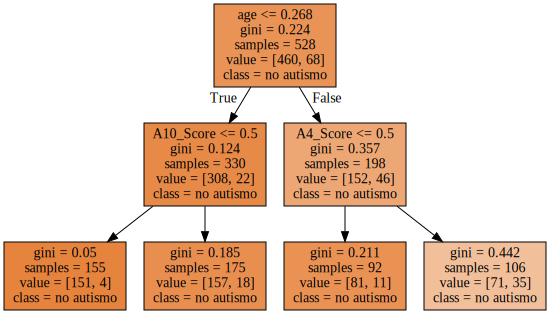

In [158]:
tree=DecisionTreeClassifier(max_depth=2, random_state=0)  #ponemos max_depth=2 porque nos daba mayor rendimiento
tree.fit(X_train, y_train)

from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["no autismo", "si autismo"],
                feature_names=dataframe_reducido.columns, impurity=True, filled=True)
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Observamos que este arbol **clasifica todos como "no autismo"** entonces **no es util para nuestro estudio**. El rendimiento con profundidad 2 era mas bueno porque la mayoria de los datos son de clase "no autismo" (clases no balanceadas).

Elijimos de utilizar una **profundidad de 5** obtenendos como rendimientos: **0.892 sobre el train y 0.852 sobre el test** que son muy bieno lo mismo pero tambien clasifica algunos datos como "si autismo".

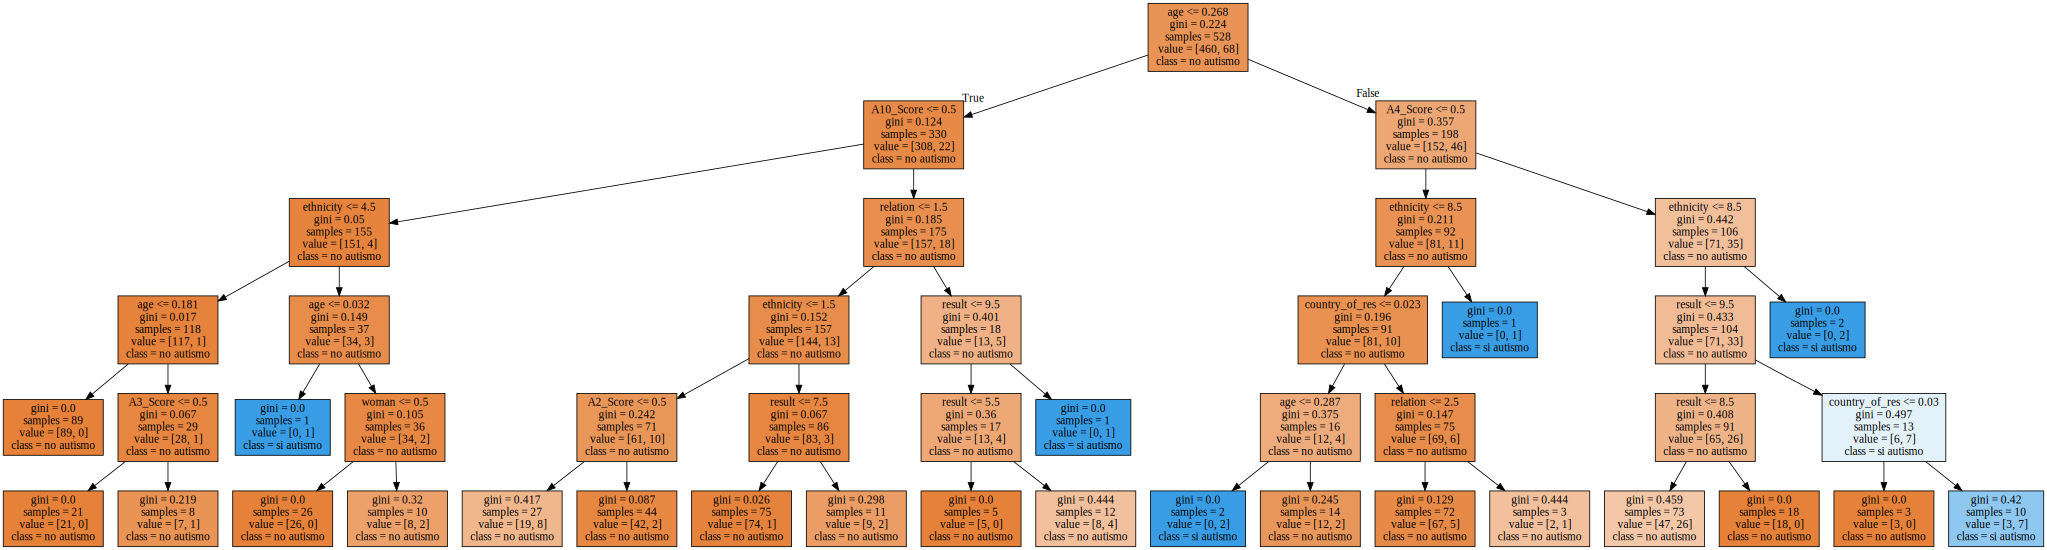

In [159]:
tree=DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)

from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["no autismo", "si autismo"],
                feature_names=dataframe_reducido.columns, impurity=True, filled=True)
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Explorando el árbol de decisión de **X_pca** utilizando las **representaciónes gráficas dadas de Graphviz**:

In [160]:
for i in range(1, 20):
    tree_pca = DecisionTreeClassifier(max_depth=i, random_state=0)
    tree_pca.fit(X_pca_train, y_pca_train)

    print("Depth: {}. Accuracy on training set: {:.3f}".format(i, tree_pca.score(X_pca_train, y_pca_train)))
    print("Depth: {}. Accuracy on test set: {:.3f}".format(i, tree_pca.score(X_pca_test, y_pca_test)))

Depth: 1. Accuracy on training set: 0.871
Depth: 1. Accuracy on test set: 0.869
Depth: 2. Accuracy on training set: 0.881
Depth: 2. Accuracy on test set: 0.858
Depth: 3. Accuracy on training set: 0.886
Depth: 3. Accuracy on test set: 0.858
Depth: 4. Accuracy on training set: 0.890
Depth: 4. Accuracy on test set: 0.858
Depth: 5. Accuracy on training set: 0.898
Depth: 5. Accuracy on test set: 0.858
Depth: 6. Accuracy on training set: 0.902
Depth: 6. Accuracy on test set: 0.852
Depth: 7. Accuracy on training set: 0.913
Depth: 7. Accuracy on test set: 0.847
Depth: 8. Accuracy on training set: 0.926
Depth: 8. Accuracy on test set: 0.835
Depth: 9. Accuracy on training set: 0.939
Depth: 9. Accuracy on test set: 0.841
Depth: 10. Accuracy on training set: 0.941
Depth: 10. Accuracy on test set: 0.841
Depth: 11. Accuracy on training set: 0.945
Depth: 11. Accuracy on test set: 0.841
Depth: 12. Accuracy on training set: 0.955
Depth: 12. Accuracy on test set: 0.835
Depth: 13. Accuracy on training se

Podando el arbol mejoramos el rendimiento sobre el conjunto de test de **X_pca**. Como antes tendremo que quedarnos a **profundidad 1** pero esto implicaria el mismo problema de antes: todos clasificados como "no autismo". Entonces nos quedamos a **profundidad 5** obteniendo como rendimiento de train **0.898** y sobre el test **0.858**.

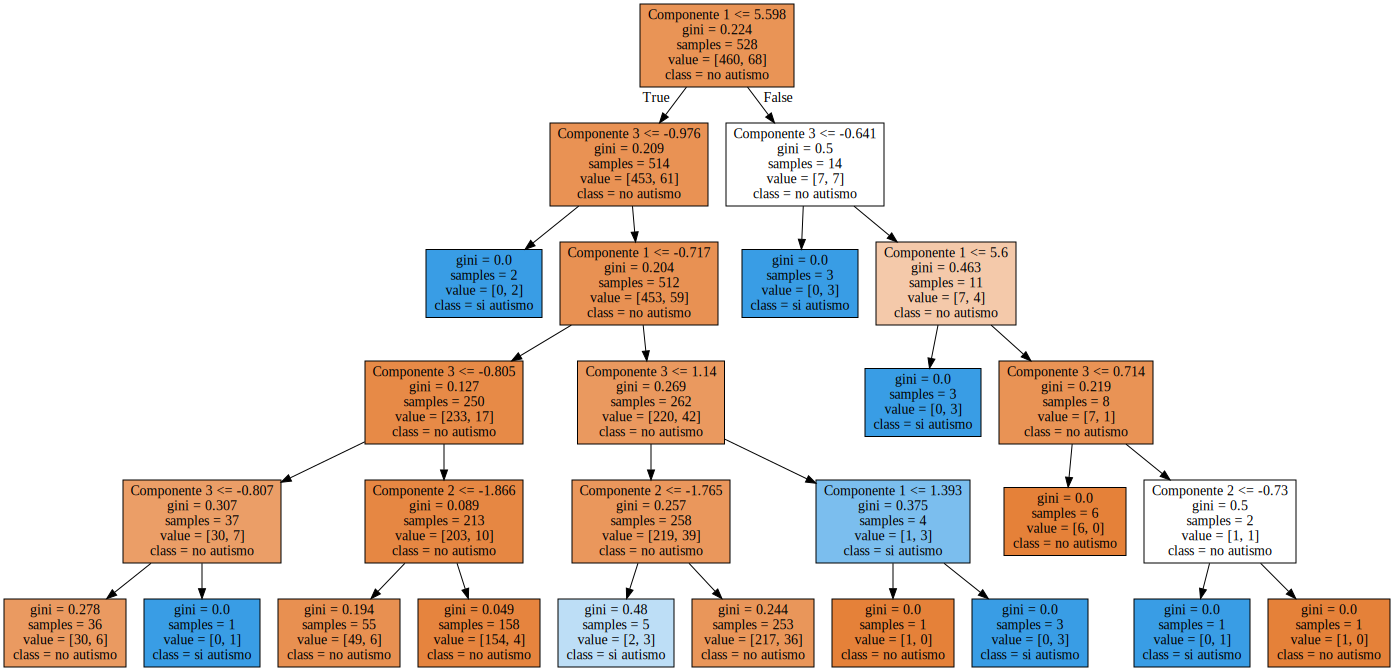

In [161]:
tree_pca=DecisionTreeClassifier(max_depth=5, random_state=0)
tree_pca.fit(X_pca_train, y_pca_train)

from sklearn.tree import export_graphviz
export_graphviz(tree_pca, out_file="tree_pca.dot", class_names=["no autismo", "si autismo"],
                feature_names=["Componente 1", "Componente 2", "Componente 3"], impurity=True, filled=True)
import graphviz

with open("tree_pca.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### Importancia de variables en árboles de decisión basada en las variables utilizadas de los modelos de aprendizaje

Los modelos basados en árboles nos proporcinan la importancia de las variables.


In [163]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.05827825 0.00501049 0.1209458  0.         0.
 0.         0.02701206 0.30862884 0.01599115 0.12639496 0.
 0.08368791 0.20896755 0.04508299 0.        ]


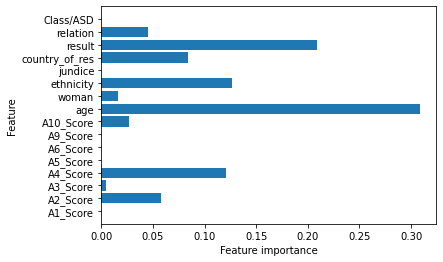

In [164]:
def plot_feature_importances(model):
    n_features = X_reducido.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), dataframe_reducido.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

In [165]:
print("Feature importances PCA:")
print(tree_pca.feature_importances_)

Feature importances PCA:
[0.42506575 0.14035612 0.43457813]


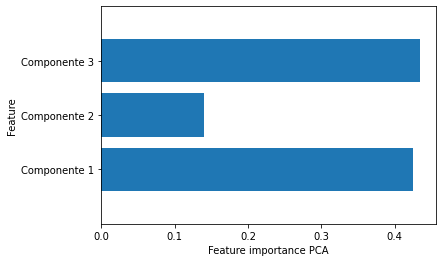

In [166]:
def plot_feature_importances(model):
    n_features = X_pca.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), ["Componente 1", "Componente 2", "Componente 3"])
    plt.xlabel("Feature importance PCA")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree_pca)

**Sabemos que si una característica no haya sido puntuada no implica que no sea importante. Simplemente el árbol no la ha usado.**
Al contrario que en otro tipo de modelos, no nos indican la importancia de una variable con respecto a un valor de la respuesta.

## Validacion de modelos

Dado que nuestro conjunto tiene **clases no balanceadas**, proceder nuestro estudio con un simple metodo Holdout o metodo Holdout con validacion y prueba nos daria problemas. Entonces **analizamos todos los metodos candidatos (Ensamble, Regresion, SVC) utilizando validacion cruzada** que permite que ningun ejemplo se "escapa" del entrenamiento ni de la evaluacion.
Para cada metodo:
- dividimos el conjunto de entrenamiento en k partes de igual tamano
- se hacen k aprendizajes: en cada uno se usa como test una de las partes y como entreanamiento las k-1 restantes
- se devuelve la media de las evaluaciones realizadas

Sabemos que **la validacion cruzada no es un metodo para aprender un modelo, sino un metodo para evaluar la bondad de un algoritmo de aprendizaje sobre un conjunto de entrenamiento dato.**
Una vez seleccionados los mejores modelos, **aprenderemos los respectivos modelos sobre todo el conjunto de entrenamiento y lo evaluaremos sobre el conjunto de prueba**.

Utilizamos el comando **cross_val_score** que sabemos que por defecto, en un problema de clasificacion, utiliza **StratifiedKFold**, un iterador que garantiza una division estratificada del conjunto train en k partes **(procurar que en cada una de las particiones la proporción de cada clase sea similar a la proporción en todo el conjunto).** 

### Random Forest (X_reducido)

In [167]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10, random_state=1234)

scores = cross_val_score(forest, X_train, y_train,cv=5) #defecto cv=5
print("Resultados de la evaluación cruzada: {}".format(scores))
print("Evaluación media: {:.3f}".format(scores.mean()))

Resultados de la evaluación cruzada: [0.85849057 0.85849057 0.86792453 0.88571429 0.83809524]
Evaluación media: 0.862


### Gradient Boosting (X_reducido)

In [168]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=1234)

scores = cross_val_score(clf, X_train, y_train,cv=5) #defecto cv=5
print("Resultados de la evaluación cruzada: {}".format(scores))
print("Evaluación media: {:.3f}".format(scores.mean()))

Resultados de la evaluación cruzada: [0.83018868 0.83018868 0.85849057 0.85714286 0.80952381]
Evaluación media: 0.837


### Extra Trees (X_reducido)

In [169]:
from sklearn.ensemble import ExtraTreesClassifier

exclf = ExtraTreesClassifier(n_estimators=100, random_state=1234)

scores = cross_val_score(exclf, X_train, y_train,cv=5) #defecto cv=5
print("Resultados de la evaluación cruzada: {}".format(scores))
print("Evaluación media: {:.3f}".format(scores.mean()))

Resultados de la evaluación cruzada: [0.87735849 0.86792453 0.86792453 0.86666667 0.84761905]
Evaluación media: 0.865


### Regresion Logistica (X_reducido)

In [170]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, X_train, y_train,cv=5) #defecto cv=5
print("Resultados de la evaluación cruzada: {}".format(scores))
print("Evaluación media: {:.3f}".format(scores.mean()))

Resultados de la evaluación cruzada: [0.87735849 0.86792453 0.86792453 0.85714286 0.85714286]
Evaluación media: 0.865


### Clasificador basado en vectores soporte (X_reducido)

In [171]:
from sklearn.svm import SVC

svc = SVC()
scores = cross_val_score(svc, X_train, y_train,cv=5) #defecto cv=5
print("Resultados de la evaluación cruzada: {}".format(scores))
print("Evaluación media: {:.3f}".format(scores.mean()))

Resultados de la evaluación cruzada: [0.86792453 0.86792453 0.86792453 0.87619048 0.87619048]
Evaluación media: 0.871


Los mejores dos modelos que salen de la comparacion utilizando validacion cruzada sobre **X_reducido** son **Regresion Logistica** (computacionalmente mejor de Extra Trees) y **SVC**.Como evaluacion media tienen respectivamente **0.865** y **0.871**.

### Random Forest (X_pca)

In [172]:
scores = cross_val_score(forest, X_pca_train, y_pca_train,cv=5) #defecto cv=5
print("Resultados de la evaluación cruzada: {}".format(scores))
print("Evaluación media: {:.3f}".format(scores.mean()))

Resultados de la evaluación cruzada: [0.82075472 0.86792453 0.83962264 0.84761905 0.81904762]
Evaluación media: 0.839


### Gradient Boosting (X_pca)

In [173]:
scores = cross_val_score(clf, X_pca_train, y_pca_train,cv=5) #defecto cv=5
print("Resultados de la evaluación cruzada: {}".format(scores))
print("Evaluación media: {:.3f}".format(scores.mean()))

Resultados de la evaluación cruzada: [0.83018868 0.83018868 0.83018868 0.81904762 0.81904762]
Evaluación media: 0.826


### Extra Trees (X_pca)

In [174]:
scores = cross_val_score(exclf, X_pca_train, y_pca_train,cv=5) #defecto cv=5
print("Resultados de la evaluación cruzada: {}".format(scores))
print("Evaluación media: {:.3f}".format(scores.mean()))

Resultados de la evaluación cruzada: [0.78301887 0.83962264 0.83962264 0.81904762 0.82857143]
Evaluación media: 0.822


### Regresion Logistica (X_pca)

In [175]:
logreg_pca = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg_pca, X_pca_train, y_pca_train,cv=5) #defecto cv=5
print("Resultados de la evaluación cruzada: {}".format(scores))
print("Evaluación media: {:.3f}".format(scores.mean()))

Resultados de la evaluación cruzada: [0.86792453 0.86792453 0.86792453 0.87619048 0.87619048]
Evaluación media: 0.871


### Clasificador basado en vectores soporte (X_pca)

In [176]:
svc_pca= SVC()
scores = cross_val_score(svc_pca, X_pca_train, y_pca_train,cv=5) #defecto cv=5
print("Resultados de la evaluación cruzada: {}".format(scores))
print("Evaluación media: {:.3f}".format(scores.mean()))

Resultados de la evaluación cruzada: [0.86792453 0.86792453 0.86792453 0.87619048 0.87619048]
Evaluación media: 0.871


Los mejores dos modelos que salen de la comparacion utilizando validacion cruzada sobre **X_pca** son **Regresion Logistica** y **SVC**.Como evaluacion media tienen ambos **0.871**.

Ahora entrenamos los **4 modelos seleccionados** y los evaluamos sobre el conjunto de test. Comprobamos de haber obtenido buenos resultados sobre el conjunto de test.

In [177]:
modelo1=logreg.fit(X_train, y_train)
print("Rendimiento Regresion Logistica sobre test con X_reducido: ",modelo1.score(X_test, y_test), "\n")

modelo2= svc.fit(X_train, y_train)
print("Rendimiento SVC sobre test con X_reducido: ",modelo2.score(X_test, y_test), "\n")

modelo3=logreg_pca.fit(X_pca_train, y_pca_train)
print("Rendimiento Regresion Logistica sobre test con X_pca: ",modelo3.score(X_pca_test, y_pca_test), "\n")

modelo4= svc_pca.fit(X_pca_train, y_pca_train)
print("Rendimiento SVC sobre test con X_pca: ",modelo4.score(X_pca_test, y_pca_test), "\n")

Rendimiento Regresion Logistica sobre test con X_reducido:  0.875 

Rendimiento SVC sobre test con X_reducido:  0.8693181818181818 

Rendimiento Regresion Logistica sobre test con X_pca:  0.8693181818181818 

Rendimiento SVC sobre test con X_pca:  0.8693181818181818 



## Ajuste de modelos: Optimización de hiperparámetros

Procedemos ajustando los modelos, optimizando para cada uno los hiperparametros: **valores propios del modelo que pueden afectar grandemente al rendimiento del mismo**. Es decir, probamos distintas combinaciones de valores para cada hiperparámetro, aprendiendo el modelo y evaluándolo en cada una de esas combinaciones, para finalmente tomar la **mejor combinación**.

Utilizamos el comando de scikitlearn `GridSearchCV`, que implementa la técnica de ajuste de parámetros **grid search + validación cruzada**. Es decir evalua cada combinación de parámetros usando validación cruzada sobre el conjunto de entrenamiento. 

Una vez encontradas las mejores combinaciónes de parámetros, los modelos finales son obtenidos entrenando con estas combinaciónes de los parámetros, sobre el total del conjunto de entrenamiento y luego se evaluan sobre el conjunto de test. 
`GridSearchCV` hace todo esto y **devuelve el mejor clasificador** (el que resulta del entrenamiento final con la mejor combinación de parámetros encontrada).

Para **Regresion Logistica** analizeremo diferente valores de **C, inverso del coeficiente de regularizacion**, mientras que para **svc** analizeremo diferente valores de **C** y de **gamma, coeficiente del kernel**.

In [178]:
param_grid = {'C': [0.000001,0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.000001,0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100]}

param_grid_rl={'C': [0.000001,0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100]}

In [179]:
from sklearn.model_selection import GridSearchCV
grid_search_1 = GridSearchCV(modelo1, param_grid_rl, cv=5)
grid_search_1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100]})

In [180]:
print("Mejor resultado (media) en validación cruzada: {:.4f}".format(grid_search_1.best_score_))
print("Mejor clasificador encontrado: {}".format(grid_search_1.best_estimator_))
print("Evaluación sobre el conjunto de test: {:.10f}".format(grid_search_1.score(X_test, y_test)))

Mejor resultado (media) en validación cruzada: 0.8712
Mejor clasificador encontrado: LogisticRegression(C=1e-06, max_iter=1000)
Evaluación sobre el conjunto de test: 0.8693181818


In [181]:
results = pd.DataFrame(grid_search_1.cv_results_)
scores = np.array(results.mean_test_score)
scores

array([0.87123091, 0.87123091, 0.87123091, 0.87123091, 0.87123091,
       0.87123091, 0.86549865, 0.8617071 , 0.8617071 ])

Para el **modelo 1** el mejor parametro de regolarizacion es **C=1e-06**, aunque el rendimiento en validacion cruzada no parece depender mucho de C. Sin embargo el rendimiento sobre el conjunto de test hecho con parametros por defecto ( C=1 ) es **mejor**, entonces nos quedamos con los **parametros por defecto**.

In [182]:
grid_search_2 = GridSearchCV(modelo2, param_grid, cv=5)
grid_search_2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100],
                         'gamma': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 100]})

In [183]:
print("Mejor resultado (media) en validación cruzada: {:.4f}".format(grid_search_2.best_score_))
print("Mejor clasificador encontrado: {}".format(grid_search_2.best_estimator_))
print("Evaluación sobre el conjunto de test: {:.10f}".format(grid_search_2.score(X_test, y_test)))

Mejor resultado (media) en validación cruzada: 0.8731
Mejor clasificador encontrado: SVC(C=10, gamma=100)
Evaluación sobre el conjunto de test: 0.8693181818


In [184]:
results = pd.DataFrame(grid_search_2.cv_results_)

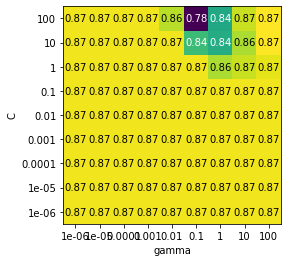

In [185]:
scores = np.array(results.mean_test_score).reshape(9,9)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

Para el **modelo 2** la mejor combinacion de parametros es **C=10, gamma=100**, aunque el rendimiento en validacion cruzada no parece depender mucho de los parametros. Sin embargo el rendimiento sobre el conjunto de test hecho con parametros por defecto ( C=1 y gamma='scale', scale=1 / (n_features * X_train.var()) ) es **lo mismo**, entonces nos quedamos con los **parametros por defecto**.

In [186]:
grid_search_3 = GridSearchCV(modelo3, param_grid_rl, cv=5)
grid_search_3.fit(X_pca_train, y_pca_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100]})

In [187]:
print("Mejor resultado (media) en validación cruzada: {:.4f}".format(grid_search_3.best_score_))
print("Mejor clasificador encontrado: {}".format(grid_search_3.best_estimator_))
print("Evaluación sobre el conjunto de test: {:.10f}".format(grid_search_3.score(X_pca_test, y_pca_test)))

Mejor resultado (media) en validación cruzada: 0.8712
Mejor clasificador encontrado: LogisticRegression(C=1e-06, max_iter=1000)
Evaluación sobre el conjunto de test: 0.8693181818


In [188]:
results = pd.DataFrame(grid_search_3.cv_results_)
scores = np.array(results.mean_test_score)
scores

array([0.87123091, 0.87123091, 0.87123091, 0.87123091, 0.87123091,
       0.87123091, 0.87123091, 0.87123091, 0.87123091])

Para el **modelo 3** el mejor parametro de regolarizacion es **C=1e-06**, aunque el rendimiento en validacion cruzada no parece depender mucho de C. Sin embargo el rendimiento sobre el conjunto de test hecho con parametros por defecto ( C=1 ) es **lo mismo**, entonces nos quedamos con los **parametros por defecto**.

In [189]:
grid_search_4 = GridSearchCV(modelo4, param_grid, cv=5)
grid_search_4.fit(X_pca_train, y_pca_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100],
                         'gamma': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 100]})

In [190]:
print("Mejor resultado (media) en validación cruzada: {:.4f}".format(grid_search_4.best_score_))
print("Mejor clasificador encontrado: {}".format(grid_search_4.best_estimator_))
print("Evaluación sobre el conjunto de test: {:.10f}".format(grid_search_4.score(X_pca_test, y_pca_test)))

Mejor resultado (media) en validación cruzada: 0.8712
Mejor clasificador encontrado: SVC(C=1e-06, gamma=1e-06)
Evaluación sobre el conjunto de test: 0.8693181818


In [191]:
results = pd.DataFrame(grid_search_4.cv_results_)

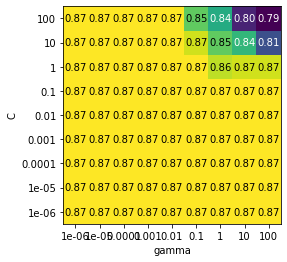

In [192]:
scores = np.array(results.mean_test_score).reshape(9,9)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

Para el **modelo 4** la mejor combinacion de parametros es **C=1e-06, gamma=1e-06**, aunque el rendimiento en validacion cruzada no parece depender mucho de los parametros. Sin embargo el rendimiento sobre el conjunto de test hecho con parametros por defecto ( C=1 y gamma='scale', scale=1 / (n_features * X_train.var()) ) es **lo mismo** de lo obtenido con parametros optimos, entonces tambien aqui nos quedamos con los **parametros por defecto**.

Aunque **no hemos obtenido muchas informaciones a traves del algoritmo de grid_search**, al final podemos elegir dos modelos candidatos en base al rendimiento sobre el conjunto de test:
- **Regresion Logistica sobre conjunto X_reducido (modelo 1)**
- **SVC sobre X_pca (modelo 4, asì que tenemos otro tipo de clasificador)**

## Evaluación final de los 2 modelos seleccionados con metricas para clasificacion binaria

Hasta ahora, hemos usado una única manera de medir el **rendimiento de un clasificador sobre un conjunto de datos: mediante la tasa de aciertos (accuracy)** damos la proporción de ejemplos bien clasificados, respecto del total de ejemplos del conjunto. 

Pero en nuestra situacion de **clases no balanceadas** (una de las dos clases es mucho más frecuente que la otra) **la tasa de error no es una buena métrica que expresa bien el verdadero rendimiento de un clasificador**. Necesitamos afinar más, buscando **métricas que reflejen realmente el rendimiento del clasificador**.

Desde la teoria conocemos dos tipos de errores en una clasificación binaria:
- **Falso positivo (FP)**: un ejemplo que es realmente negativo es clasificado como positivo por el modelo
- **Falso negativo (FN)**: un ejemplo que es realmente positivo es clasificado como negativo por el modelo. 

Dualmente, existen dos tipos de aciertos en una clasificación binaria:
- **Verdadero positivo (TP)**: un ejemplo positivo bien clasificado por el modelo
- **Verdadero negativo (TN)**: un ejemplo negativo bien clasificado por el modelo

**En nuestro estudio, tratandose de un diagnostico de enfermedad, un FP es más aceptable que un FN.**

### **Matriz confusion**

In [193]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test,modelo1.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[153   0]
 [ 22   1]]


In [194]:
confusion = confusion_matrix(y_pca_test,modelo4.predict(X_pca_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[153   0]
 [ 23   0]]


Como se observa en las correspondientes matrices de confusión, ambos clasificadores **no son capables de detectar los positivos**, que es muy importante tratandose de un estudio diagnostico.

No todos los aciertos o errores tienen la misma importancia. Por eso utilizamos mas de una medida para captar el impacto de todos los tipos de errores.

- **Precision**: proporcion de los clasificados como positivos que lo son realmente (1/(0+1) por modelo 1 y 0/(0+0) por modelo 4, que consideramos 0)
- **Recall**: proporcion de verdaderos positivos clasificados como positivos (respetivamente 1/(22+1) y 0/(23+0))

Si bien precision y recall en conjunto suponen una buena métrica para evaluar en problemas binarios en el que las clases no están equilibradas, a veces se usa una única medida, que en este caso sería la media armónica de ambas cantidades, denominado **medida F1**:

\begin{equation}
\text{F1} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
\end{equation}

### Tasa de aciertos balanceada (balanced accuracy)

Hay otra medida combinada, la precisión balanceada, que combina la sensibilidad o recall y la especificidad. Una forma más intuitiva de ver esta métrica es como la media de las tasas de aciertos calculadas sobre las clases positiva y negativa respectivamente.


$$B_{acc} =\frac{Sensibility + Especificity}{2} = \frac{\frac{TP}{TP+FN} + \frac{TN}{FP+TN}}{2}$$

In [195]:
from sklearn.metrics import balanced_accuracy_score

print("Tasa de aciertos balanceada regresión logística: {:.2f}".format(
    balanced_accuracy_score(y_test,modelo1.predict(X_test))))

print("Tasa de aciertos balanceada SVC: {:.2f}".format(
    balanced_accuracy_score(y_pca_test,modelo4.predict(X_pca_test))))

#valores muy malos

Tasa de aciertos balanceada regresión logística: 0.52
Tasa de aciertos balanceada SVC: 0.50


Aunque, tanto F1 como la precisión balanceada, pueden llegar a captar en una sola cifra la comparativa entre clasificadores, es difícil de interpretar intuitivamente. Si se prefieren ver todas las medidas, es útil usar la función classification_report:

In [196]:
from sklearn.metrics import classification_report
print(classification_report(y_test, modelo1.predict(X_test),
                            target_names=["no autismo", "si autismo"]))

              precision    recall  f1-score   support

  no autismo       0.87      1.00      0.93       153
  si autismo       1.00      0.04      0.08        23

    accuracy                           0.88       176
   macro avg       0.94      0.52      0.51       176
weighted avg       0.89      0.88      0.82       176



In [197]:
from sklearn.metrics import classification_report
print(classification_report(y_pca_test, modelo4.predict(X_pca_test),
                            target_names=["no autismo", "si autismo"]))

              precision    recall  f1-score   support

  no autismo       0.87      1.00      0.93       153
  si autismo       0.00      0.00      0.00        23

    accuracy                           0.87       176
   macro avg       0.43      0.50      0.47       176
weighted avg       0.76      0.87      0.81       176



C:\Users\matte\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Mejoramos nuestras predicciones usando la incertidumbre en las predicciones: umbrales y curvas

Analizamos los grados de incertidumbre en las predicciones para ambos los modelos, utilizando los siguientes metodos de scikitlearn:

- `decision_function`: en este caso, el grado de certidumbre se da en forma de valor en los números reales (positivo o negativo). Es el caso, por ejemplo, de un clasificador basado en máquinas de vectores soporte SVC. 

- `predict_proba`: en este caso, el grado de certidumbre se da en forma de probabilidad (un valor entre 0 y 1). Por ejemplo, el caso de regresión logística. 

En ambos casos **existen unos valores por defecto del _umbral_ en la incertidumbre**, a partir del cual decidimos clasificar un ejemplo como de la clase positiva. En el caso de funciones de decisión, ese umbral es 0 y en el caso probabilístico, el umbral por defecto es 0.5.

**Modificamos los umbrales de aceptacion para hacer que el clasificador sea meno estricto a la hora de clasificar un ejemplo como positivo**.

In [198]:
y_pred_lower_threshold = modelo1.predict_proba(X_test)[:,1] > 0.2   #probamos, despues utilizeremos las curvas roc para individuar el valor optimo
y_pred_lower_threshold=np.where(y_pred_lower_threshold,'yes','no')
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

          no       0.92      0.81      0.86       153
         yes       0.29      0.52      0.38        23

    accuracy                           0.77       176
   macro avg       0.61      0.67      0.62       176
weighted avg       0.84      0.77      0.80       176



In [199]:
confusion = confusion_matrix(y_test,y_pred_lower_threshold)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[124  29]
 [ 11  12]]


In [200]:
y_pred_lower_threshold = modelo4.decision_function(X_pca_test) > -1
y_pred_lower_threshold=np.where(y_pred_lower_threshold,'yes','no')
y_pred_lower_threshold
y_pca_test
print(classification_report(y_pca_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

          no       0.91      0.69      0.79       153
         yes       0.20      0.52      0.29        23

    accuracy                           0.67       176
   macro avg       0.55      0.61      0.54       176
weighted avg       0.81      0.67      0.72       176



In [201]:
confusion = confusion_matrix(y_pca_test,y_pred_lower_threshold)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[106  47]
 [ 11  12]]


**Notamos que al bajar del umbral obtenemos menos FN y más FP (sube el recall pero baja la precision).**

### **Curva Precision Recall**

Construimos curvas P-R para los dos modelos.

In [202]:
from sklearn.metrics import precision_recall_curve
y_0_1=np.where(y_test=='yes',1,0)
precision, recall, thresholds = precision_recall_curve(y_0_1, modelo1.predict_proba(X_test)[:,1])

Esta función precision_recall_curve devuelve tres arrays: respectivamente con los valores de precisión, de recall y de umbrales. La lista de umbrales la dan los distintos valores de decision_function o de predict_proba.

Podemos imprimir esta información, y ver cómo va variando la precision y el recall:

In [203]:
for u,p,r in zip(thresholds,precision,recall):
    print("Umbral: {:.10f}. (P,R)=({:.4f},{:.4f})".format(u,p,r))

Umbral: 0.0806652187. (P,R)=(0.1917,1.0000)
Umbral: 0.0813135701. (P,R)=(0.1849,0.9565)
Umbral: 0.0819479569. (P,R)=(0.1864,0.9565)
Umbral: 0.0829156202. (P,R)=(0.1880,0.9565)
Umbral: 0.0835878500. (P,R)=(0.1897,0.9565)
Umbral: 0.0839422386. (P,R)=(0.1913,0.9565)
Umbral: 0.0843534276. (P,R)=(0.1930,0.9565)
Umbral: 0.0848101136. (P,R)=(0.1947,0.9565)
Umbral: 0.0853173086. (P,R)=(0.1964,0.9565)
Umbral: 0.0857670166. (P,R)=(0.1982,0.9565)
Umbral: 0.0861695312. (P,R)=(0.2000,0.9565)
Umbral: 0.0866303813. (P,R)=(0.2018,0.9565)
Umbral: 0.0873624799. (P,R)=(0.2037,0.9565)
Umbral: 0.0882863733. (P,R)=(0.2056,0.9565)
Umbral: 0.0892900356. (P,R)=(0.2075,0.9565)
Umbral: 0.0897350289. (P,R)=(0.2095,0.9565)
Umbral: 0.0948801084. (P,R)=(0.2115,0.9565)
Umbral: 0.0977737644. (P,R)=(0.2136,0.9565)
Umbral: 0.0980405807. (P,R)=(0.2157,0.9565)
Umbral: 0.0995617270. (P,R)=(0.2178,0.9565)
Umbral: 0.1006440857. (P,R)=(0.2200,0.9565)
Umbral: 0.1025818355. (P,R)=(0.2121,0.9130)
Umbral: 0.1029314190. (P,R)=(0.2

In [204]:
y_pca_0_1=np.where(y_pca_test=='yes',1,0)
precision_pca, recall_pca, thresholds_pca = precision_recall_curve(y_pca_0_1, modelo4.decision_function(X_pca_test))

In [205]:
for u,p,r in zip(thresholds,precision,recall):
    print("Umbral: {:.10f}. (P,R)=({:.4f},{:.4f})".format(u,p,r))

Umbral: 0.0806652187. (P,R)=(0.1917,1.0000)
Umbral: 0.0813135701. (P,R)=(0.1849,0.9565)
Umbral: 0.0819479569. (P,R)=(0.1864,0.9565)
Umbral: 0.0829156202. (P,R)=(0.1880,0.9565)
Umbral: 0.0835878500. (P,R)=(0.1897,0.9565)
Umbral: 0.0839422386. (P,R)=(0.1913,0.9565)
Umbral: 0.0843534276. (P,R)=(0.1930,0.9565)
Umbral: 0.0848101136. (P,R)=(0.1947,0.9565)
Umbral: 0.0853173086. (P,R)=(0.1964,0.9565)
Umbral: 0.0857670166. (P,R)=(0.1982,0.9565)
Umbral: 0.0861695312. (P,R)=(0.2000,0.9565)
Umbral: 0.0866303813. (P,R)=(0.2018,0.9565)
Umbral: 0.0873624799. (P,R)=(0.2037,0.9565)
Umbral: 0.0882863733. (P,R)=(0.2056,0.9565)
Umbral: 0.0892900356. (P,R)=(0.2075,0.9565)
Umbral: 0.0897350289. (P,R)=(0.2095,0.9565)
Umbral: 0.0948801084. (P,R)=(0.2115,0.9565)
Umbral: 0.0977737644. (P,R)=(0.2136,0.9565)
Umbral: 0.0980405807. (P,R)=(0.2157,0.9565)
Umbral: 0.0995617270. (P,R)=(0.2178,0.9565)
Umbral: 0.1006440857. (P,R)=(0.2200,0.9565)
Umbral: 0.1025818355. (P,R)=(0.2121,0.9130)
Umbral: 0.1029314190. (P,R)=(0.2

Dibujamos las dos curvas para confrontar los dos modelos:

Text(0.5, 1.0, 'Curva P-R modelo 4')

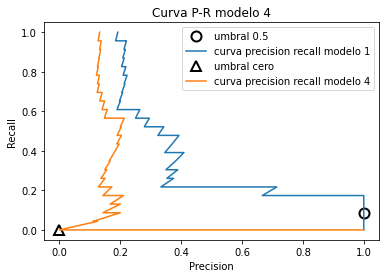

In [206]:
close_zero = np.argmin(np.abs(thresholds-0.5)) #umbral mas cercano a 0.5
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="umbral 0.5", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="curva precision recall modelo 1")

close_zero_pca = np.argmin(np.abs(thresholds_pca)) #umbral mas cercano a 0
plt.plot(precision_pca[close_zero_pca], recall_pca[close_zero_pca], '^', markersize=10,
         label="umbral cero", fillstyle="none", c='k', mew=2)

plt.plot(precision_pca, recall_pca, label="curva precision recall modelo 4")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.title("Curva P-R modelo 4")

Aunque ambas las curvas no parecen muy buenas, podemos decir que el **modelo 1, fijado un nivel de Recall, tiene un valor mayor de Precision (y viceversa)**

Comprobamos cuanto dicho con un indice de precisión media, que en scikit learn se calcula con **average_precision_score**. En el caso de los dos clasificadores anteriores:

In [209]:
from sklearn.metrics import average_precision_score
ap_1 = average_precision_score(y_0_1, modelo1.predict_proba(X_test)[:, 1])
ap_4 = average_precision_score(y_pca_0_1, modelo4.decision_function(X_pca_test))
print("Precisión media de modelo 1: {:.3f}".format(ap_1))
print("Precisión media de modelo 4: {:.3f}".format(ap_4))

Precisión media de modelo 1: 0.428
Precisión media de modelo 4: 0.163


### ROC curve

En scikit learn, la función roc_curve calcula los puntos de la curva ROC para los diferentes umbrales.

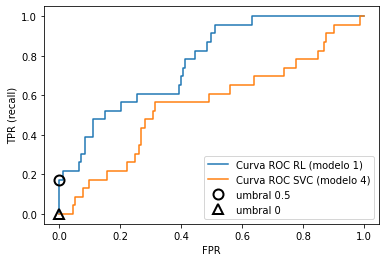

In [210]:
from sklearn.metrics import roc_curve
fpr_4, tpr_4, thresholds_4 = roc_curve(y_pca_0_1, modelo4.decision_function(X_pca_test))
fpr_1, tpr_1, thresholds_1 = roc_curve(y_0_1, modelo1.predict_proba(X_test)[:, 1])

plt.plot(fpr_1, tpr_1, label="Curva ROC RL (modelo 1)")
plt.plot(fpr_4, tpr_4, label="Curva ROC SVC (modelo 4)")

close_default = np.argmin(np.abs(thresholds_1-0.5)) # find threshold closest to 0.5
close_zero = np.argmin(np.abs(thresholds_4)) # find threshold closest to 0
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr_1[close_default], tpr_1[close_default], 'o', markersize=10,
         label="umbral 0.5", fillstyle="none", c='k', mew=2)

plt.plot(fpr_4[close_zero], tpr_4[close_zero], '^', markersize=10,
         label="umbral 0", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

Notamos que nuevamente el **modelo 1 parece mejor del modelo 4**, dado que la curva ROC asociada al modelo 1 esta siempre por encima de la otra.

Medimos el **área bajo la curva** y por eso esta medida se denomina AUC (area under the curve). En scikit learn, la función **roc_auc_score** calcula el AUC de un clasificador sobre un conjunto de ejemplos. Comprobamos con el AUC que el modelo 1 es mejor.

In [211]:
from sklearn.metrics import roc_auc_score
rl_auc = roc_auc_score(y_0_1, modelo1.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_pca_0_1, modelo4.decision_function(X_pca_test))
print("AUC de RL (MODELO 1): {:.3f}".format(rl_auc))
print("AUC de SVC (MODELO 4): {:.3f}".format(svc_auc))

AUC de RL (MODELO 1): 0.768
AUC de SVC (MODELO 4): 0.552


Como se observa, la medida AUC nos indica que el **clasificador basado en regresion logistica es algo mejor que el basado en máquinas de vectores soporte**. Ademas, se demuestra que cuando las clases **no están equilibradas**, la medidad AUC es más adecuada.

Entonces, finalmente selecionamos como modelo definitivo el modelo 1: Una **Regresion Logistica sobre un conjunto reducido de variables (16 variables)**

Buscamos la **mejor combinacion (FalsePositiveRate,TruePositiveRate) y utilizamos el umbral correspondiente como umbral del modelo.**

In [212]:
for f,t,thr in zip(fpr_1, tpr_1, thresholds_1):
    print("Umbral: {:.12f}. (FPR,TPR): ({:.8f},{:.8f})".format(thr,f,t))

Umbral: 1.570431724481. (FPR,TPR): (0.00000000,0.00000000)
Umbral: 0.570431724481. (FPR,TPR): (0.00000000,0.04347826)
Umbral: 0.475641209491. (FPR,TPR): (0.00000000,0.17391304)
Umbral: 0.435024460043. (FPR,TPR): (0.01307190,0.17391304)
Umbral: 0.407716364081. (FPR,TPR): (0.01307190,0.21739130)
Umbral: 0.311870525862. (FPR,TPR): (0.06535948,0.21739130)
Umbral: 0.307491525855. (FPR,TPR): (0.06535948,0.26086957)
Umbral: 0.302742805767. (FPR,TPR): (0.07189542,0.26086957)
Umbral: 0.291412036840. (FPR,TPR): (0.07189542,0.30434783)
Umbral: 0.290360730152. (FPR,TPR): (0.08496732,0.30434783)
Umbral: 0.288793491453. (FPR,TPR): (0.08496732,0.39130435)
Umbral: 0.274959708190. (FPR,TPR): (0.11111111,0.39130435)
Umbral: 0.273542589504. (FPR,TPR): (0.11111111,0.47826087)
Umbral: 0.222171835387. (FPR,TPR): (0.15032680,0.47826087)
Umbral: 0.221755197812. (FPR,TPR): (0.15032680,0.52173913)
Umbral: 0.198730079224. (FPR,TPR): (0.20261438,0.52173913)
Umbral: 0.196192028362. (FPR,TPR): (0.20261438,0.5652173

In [213]:
nuevo_umbral=0.100644085722
y_pred_mod = modelo1.predict_proba(X_test)[:,1] > nuevo_umbral
print("Matriz de confusión cambiando el umbral:\n",confusion_matrix(y_0_1,y_pred_mod))

Matriz de confusión cambiando el umbral:
 [[75 78]
 [ 2 21]]


## Presentación de resultados

La muy **alta variabilidad** del autismo rende **muy dificil plantear un clasificador con resultados optimos**. 

De estudios literarios se ha demostrado que es casi **imposible encontrar características similares entre sujetos autistas**. De hecho para diagnosticar la presencia de autismo se necesita un **equipo multidisciplinar de profesionales con formación específica en TEA**, en el que están presentes distintos profesionales, como psicólogos, médicos, logopedas, profesores especializados, psicomotricistas, etc.

Además los **trastornos del espectro autista** (nuevo nombre atribuido al autismo debido a su alta variabilidad en su manifestacion) tiene **muchas comorbilidades**, es decir hay otros trastornos y enfermedades que van junto con la enfermedad principal. Por eso es **fundamental ser capaz de discriminar el trastorno del espectro autista de otros trastornos asociados** para definir las **intervenciones adecuadas y esenciales para favorecer el desarrollo y la calidad de vida de los sujetos con autismo**. 

Puede ser que los sujetos **"falsos negativos"** (autistas que no individuamos) sean **autistas ad alto funcionamento** y/o que han desarrollado **mecanismos de compensación** que han sido útiles para enmascarar y **manejar las dificultades**. Cuidado: esto no quiere decir que no hayan quedado **signos residuales de autismo que puedan comprometer muchas áreas de su vida como el trabajo y la sociedad**.

Entonces creemos que sea importante individuar la mayor parte de las personas que necesitan ayuda para mejorar sus condiciones de vida. Por eso nuestro clasificador final tendrà un **ratio de verdadero positivo muy alto (alrededor del 96%)** a coste de un **ratio de falsos positivos alto (alrededor del 51%).**

Claramente esta es la nuestra conclusión que damos con nuestro **humilde intento de explorar e investigar lo más posible este complejo trastorno** que podemos definir no como un trastorno claro, sino como una "**constelación de síntomas**" que causan el síndrome de los trastornos del espectro autista.

Terminamos nuestro trabajo con esta imagen que pensamos pueda reflejar la **dificultad de clasificar y representar sintéticamente los trastornos del espectro autista** y, al contrario, la sencillez con la que el amor puede constituir una solución válida para mejorar la vida a los sujetos autistas y no solo a ellos...

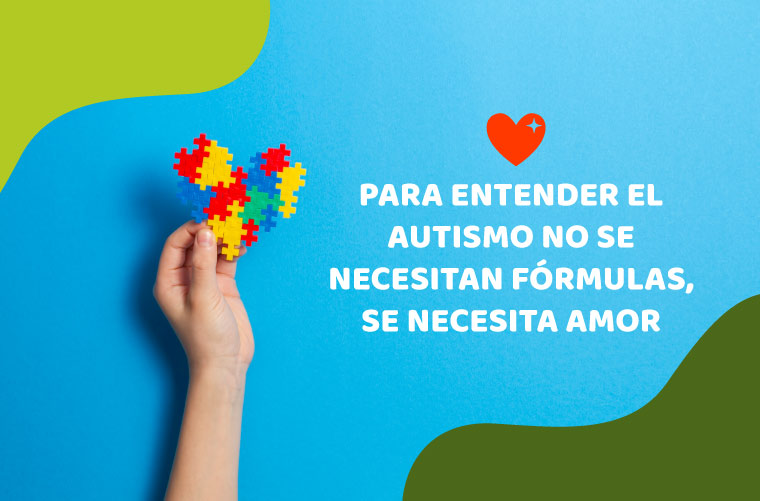

In [214]:
from IPython import display
display.Image("https://d2lcsjo4hzzyvz.cloudfront.net/blog/wp-content/uploads/2021/03/31163717/AUTISMO.jpg")